### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

The National Health Services (NHS), a publicly funded healthcare system in England, is confronted with the imperative need to align its infrastructure and resources with the escalating demands of its growing population. Efficient budget allocation is pivotal to this process, and in making informed decisions, a comprehensive understanding of the utilisation patterns across various components within the healthcare network becomes indispensable. Currently, there exists a divergence of opinions among stakeholders regarding the adequacy of the NHS's capacity. While some advocate for an expansion in capacity, others contend that the current trends in utilisation suggest sufficiency, emphasising the importance of optimising existing infrastructure and resources. In light of this, there is a critical need to delve into the available data, discern utilisation trends, and provide actionable insights that inform strategic decisions for budget allocation and resource optimisation.

To investigate the above, the NHS has initiated a project aimed at tackling the problem of missed appointments, which pose considerable financial burdens on the healthcare system. The goal is to comprehend the underlying causes of missed appointments and devise evidence-based approaches to minimise or eradicate them. The analysis utilises Python to explore the available data, create visualisations to examine and communicate trends, and extract meaningful insights to inform decision-making. 

## 1) Analytical Approach
The analytical approach encompasses a multidimensional investigation into NHS appointments data and healthcare-related tweets on Twitter. It begins with exploratory data analysis (EDA) of NHS datasets to uncover appointment scheduling trends, service utilisation patterns, and data quality issues. This involves descriptive statistics, trend analysis, and correlation studies to extract insights. Simultaneously, Twitter trends analysis identifies popular healthcare topics, professional communities, and topics related to current affairs. The approach emphasises identifying patterns, correlations, and anomalies in the data to inform strategic decision-making within the NHS. Integration of findings from all datasets allows for a comprehensive understanding of appointment dynamics and healthcare discourse. The approach underscores the importance of data-driven insights in optimising resource allocation, improving service delivery, and enhancing communication strategies within the healthcare sector.

## 2) Assignment activity 2
**Basic exploration and descriptive statistics.**
- Import the three indicated data sources and perform basic exploratory analysis including obtaining descriptive statistics.
- Determine and comment on the quality, usefulness, and opportunities contained in the data sets.
- Document initial observations and findings.

Are there any comments regarding data quality or descriptive statistics worth noting for each of the data sets?
Can you comment on other features (columns) that could potentially be useful in your analysis?

**As per Metadata info:** Data collection from GP systems lacks national standards, leading to variations in data quality. Inconsistencies arise in appointment status reporting, with unclear attendance records and under-reporting of DNA appointments until November 2018. Appointment mode data suffer from local variations and missing data, particularly from July 2019 for Cegedim practices. Actual duration data varies by system supplier, and healthcare professional type reporting has been incorrect since October 2017. These issues affect appointment attendance accuracy, mode categorization, duration reporting, and healthcare professional classification, undermining data reliability from June 2018 onwards.

**Additionally** the datasets span different timeframes:
* ar = Jan/2020 to Jun/2022
* nc = Aug/2021 to Jun/2022
* ad = Dec/2021 to Jun/2022

Despite 'icb_ons_code' being present as Primary Key between all 3 datasets, variation in recording practices mean that DFs cannot reliably be merged without significant impacts on overall data quality, and hence, data reliability. Addressing this would require application of advanced statistical methods, which goes beyond the scope of this assignment.

### Prepare your workstation

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
from scipy.stats import f_oneway
from wordcloud import WordCloud

# Optional - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Actual Duration (ad)

In [2]:
# Import and sense-check 'actual_duration.csv' as ad
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# Create new DataFrame
# Check for missing values
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [4]:
# Checking DataFrame shape
ad.shape

(137793, 8)

In [5]:
# Checking dtypes to determine if they are in correct format
#ad.dtypes

In [6]:
# Column names of data set
my_list = ad.columns.values.tolist()
#my_list

In [7]:
# Metadata of ad
#ad.info()

In [8]:
# Descriptive statistics and metadata of ad
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


### Change dtype 'appointment_date' to datetime

In [9]:
# Check the unique values in the 'appointment_date' column
#print(ad['appointment_date'].unique())

# Convert the 'appointment_date' column to datetime
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'],
                                        format='%d-%b-%y')

# Check the data types after conversion
#print(ad.dtypes)

### Calculate % of Unknown/Data Quality (ad)

In [10]:
# Filter rows with 'Unknown / Data Quality' duration
unknown_data_quality = ad[ad['actual_duration'] == 'Unknown / Data Quality']

# Calculate the total count of appointments with 'Unknown / Data Quality'
total_unknown_data_quality = unknown_data_quality['count_of_appointments'].sum()

# Calculate the total count of all appointments
total_appointments = ad['count_of_appointments'].sum()

# Calculate the percentage
percentage_unknown_data_quality = (total_unknown_data_quality / total_appointments) * 100

print("Percentage of appointments with 'Unknown / Data Quality' in 'ad' is: {:.2f}%"\
      .format(percentage_unknown_data_quality))


Percentage of appointments with 'Unknown / Data Quality' in 'ad' is: 23.98%


In [11]:
# There are 7 unique Region codes
# Calculate the percentage of 'Unknown / Data Quality' for each region

# Filter rows with 'Unknown / Data Quality' duration
unknown_data_quality = ad[ad['actual_duration'] == 'Unknown / Data Quality']

# Group by 'region_ons_code' and calculate total count of appointments for each group
total_apptmt_per_region = ad.groupby('region_ons_code')\
['count_of_appointments'].sum()

# Group by 'region_ons_code' and calculate total count of appointments
# with 'Unknown / Data Quality' for each group
total_unknown_by_region = unknown_data_quality\
.groupby('region_ons_code')['count_of_appointments'].sum()

# Calculate the percentage for each region
percentage_unknown_by_region = (total_unknown_by_region / total_apptmt_per_region) * 100

print("Percentage of appointments with 'Unknown / Data Quality' for each region in 'ad':")
for region_code, percentage in percentage_unknown_by_region.items():
    print("Region {}: {:.2f}%".format(region_code, percentage))

Percentage of appointments with 'Unknown / Data Quality' for each region in 'ad':
Region E40000003: 29.94%
Region E40000005: 24.20%
Region E40000006: 20.52%
Region E40000007: 19.85%
Region E40000010: 30.18%
Region E40000011: 22.15%
Region E40000012: 21.41%


In [12]:
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


#### Investigating most popular/common Appointment Length

In [13]:
# Group by 'actual_duration' and sum the 'count_of_appointments' for each group
popular_duration = ad.groupby('actual_duration')\
['count_of_appointments'].sum()

# Sort the result in descending order
popular_duration_sorted = popular_duration.sort_values(ascending=False)

# Visualize the output
print("Appointment lengths in 'ad' by Nr. of Appointments:")
print(popular_duration_sorted)

Appointment lengths in 'ad' by Nr. of Appointments:
actual_duration
Unknown / Data Quality    40284086
6-10 Minutes              33800815
1-5 Minutes               28600865
11-15 Minutes             25160882
16-20 Minutes             16004247
21-30 Minutes             15026365
31-60 Minutes              9103432
Name: count_of_appointments, dtype: int64


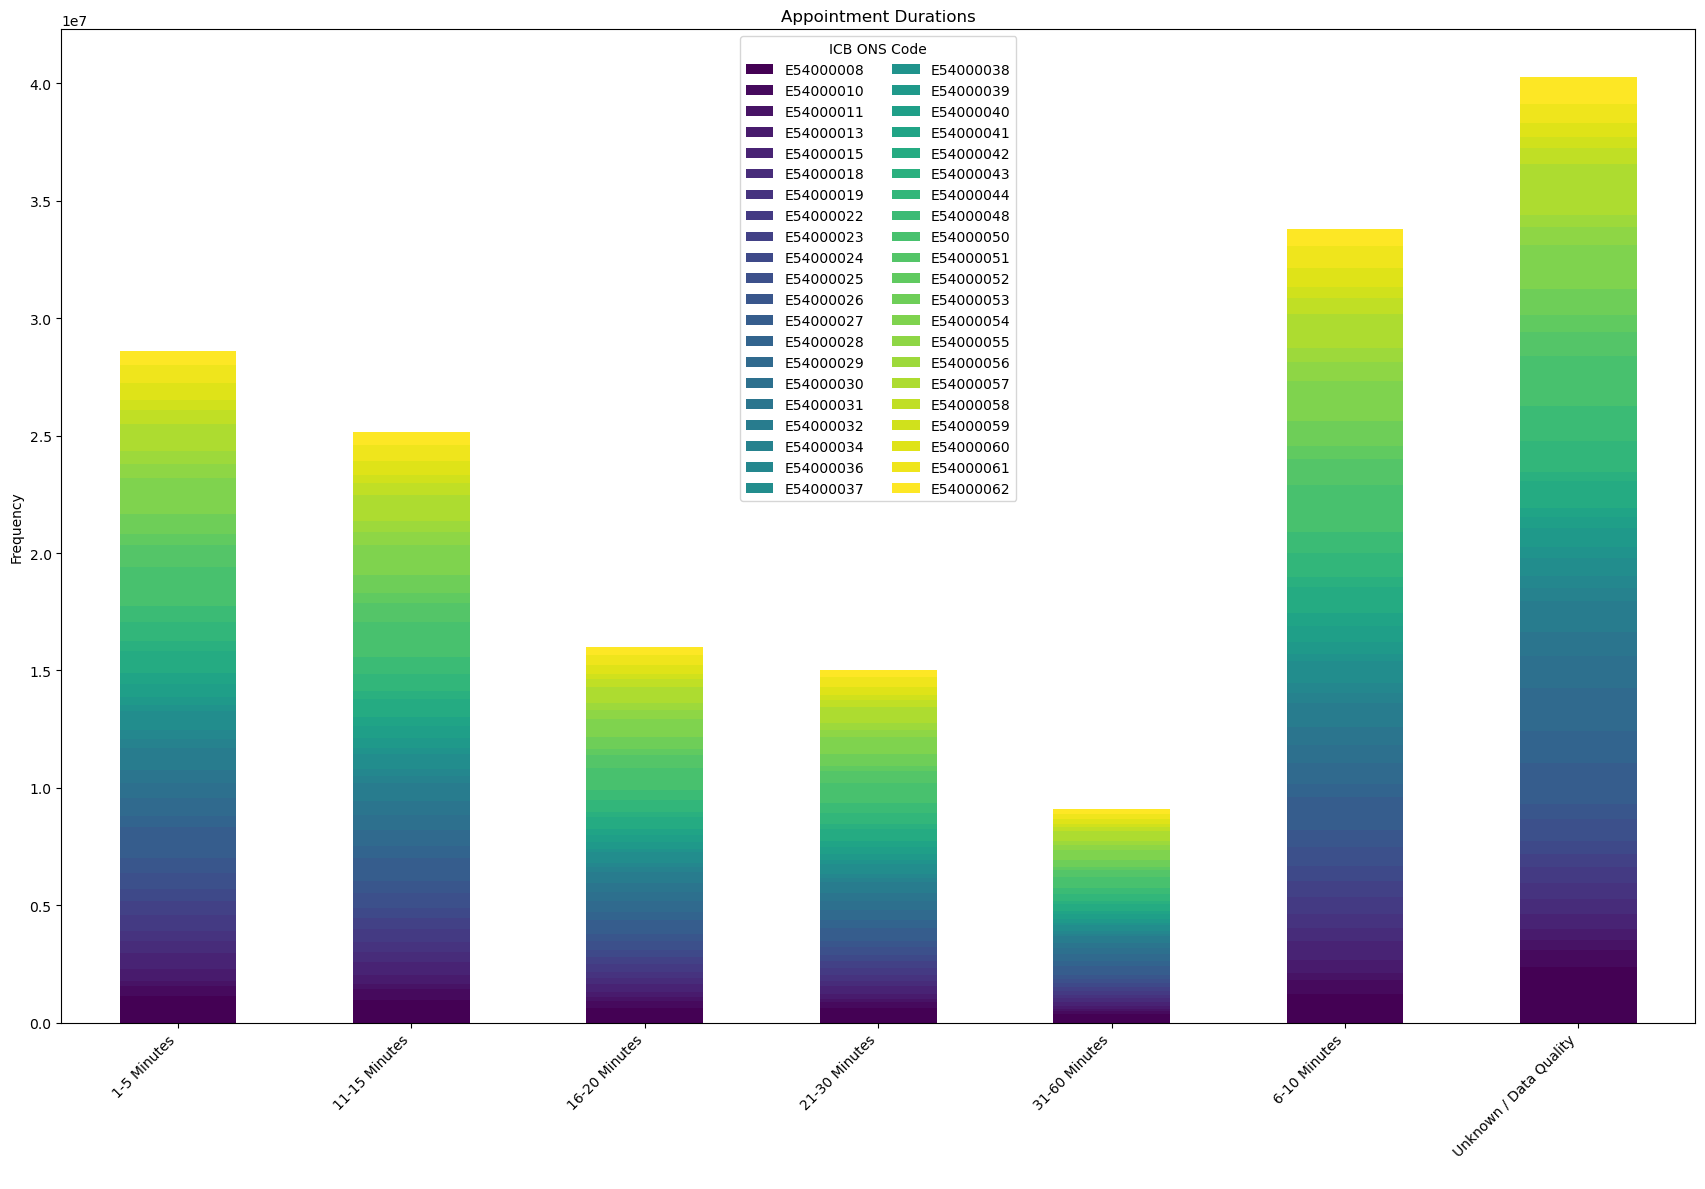

In [14]:
# Pivot the DataFrame
pivot_table = ad.pivot_table(index='actual_duration',
                             columns='icb_ons_code',
                             values='count_of_appointments',
                             aggfunc='sum')

# Plotting
fig, ax = plt.subplots(figsize=(20, 12))
pivot_table.plot(kind='bar',
                 stacked=True,
                 cmap='viridis',
                 ax=ax)
plt.title('Appointment Durations')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Manually create a legend with two columns
handles, labels = plt.gca().get_legend_handles_labels()
num_columns = 2
plt.legend(handles, labels, title='ICB ONS Code',
           loc='upper center',
           ncol=num_columns)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

**Actual Duration descriptive statistics and EDA summary:** 
* Duration data spans from **Dec/2021 to Jun/2022**.
* No missing values detected.
* Descriptive statistics show a **mean of 1219.08** appointments with a **standard deviation of 1546.90**.
* **23.98%** of appointments have 'Unknown / Data Quality'.
* **Popular durations:** 'Unknown / Data Quality', '6-10 Minutes', and '1-5 Minutes'.
* Regional distribution of 'Unknown / Data Quality' **varies from 19.85% to 30.18%**.

# Appointments Regional (ar)

In [15]:
# Import and sense-check 'appointments_regional.csv' as ar
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [16]:
# Create new DataFrame
# Check for missing values
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [17]:
# Column names of data set.
my_list = ar.columns.values.tolist()
#my_list

In [18]:
# Check dtypes
#print(ar.dtypes)

In [19]:
# Adjust dtype for 'appointment_month' from object to datetime
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'],
                                         format='%Y-%m')
#print(ar.dtypes)

In [20]:
# Metadata for ar
#ar.info()

In [21]:
# Descriptive statistics of ar
ar.describe()

,appointment_month,count_of_appointments
count,596821,596821.000000
mean,2021-03-19 11:31:17.489565696,1244.601857
min,2020-01-01 00:00:00,1.000000
25%,2020-08-01 00:00:00,7.000000
50%,2021-04-01 00:00:00,47.000000
75%,2021-11-01 00:00:00,308.000000
max,2022-06-01 00:00:00,211265.000000
std,NaN,5856.887042


In [22]:
# Checking array for unique objects
#ar['time_between_book_and_appointment'].unique()

**Appointments Regional descriptive statistics and EDA summary:**
* Data covers from Jan/2020 to Jun/2022.
* No missing values found.
* Mean appointments per month: 1244.60 with a standard deviation of 5856.89.
* Most appointments occur within 1 to 7 days of booking.

# National Categories (nc)

In [23]:
# Import and sense-check 'national_categories.xlsx' as nc
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame head
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [24]:
# Create new DataFrame
# Check for missing values
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [25]:
# Column names of data set
my_list = nc.columns.values.tolist()
#my_list

In [26]:
# Adjust dtype for 'appointment_month' from object to datetime
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'],
                                         format='%Y-%m')
#print(nc.dtypes)

In [27]:
# Descriptive statistics and metadata of nc
#print(nc.describe(include = 'object'))
#print(nc.info())
nc.describe()

,appointment_date,count_of_appointments,appointment_month
count,817394,817394.000000,817394
mean,2022-01-16 00:50:35.860796160,362.183684,2022-01-01 07:17:28.394287616
min,2021-08-01 00:00:00,1.000000,2021-08-01 00:00:00
25%,2021-10-25 00:00:00,7.000000,2021-10-01 00:00:00
50%,2022-01-18 00:00:00,25.000000,2022-01-01 00:00:00
75%,2022-04-07 00:00:00,128.000000,2022-04-01 00:00:00
max,2022-06-30 00:00:00,16590.000000,2022-06-01 00:00:00
std,NaN,1084.576600,NaN


**National Categories descriptive statistics and EDA summary:**
* Data spans from Aug/2021 to Jun/2022.
* No missing values.
* Mean appointments: 362.18 with a standard deviation of 1084.58.
* Most appointments fall within 'General Practice' and 'General Consultation Acute'.
* Appointment counts vary widely with a minimum of 1 and a maximum of 16590.


##### Note: 'appointment_month' columns were converted to datetime format for consistent analysis (all DFs)

## Further exploration and additional questions:


**Question 1:** How many locations are there in the data set?

In [28]:
# Determine the number of SUB locations, from Actual Duration (ad)
locations_ad = ad['sub_icb_location_name'].nunique()
print('Total number of different sub locations for ad is:', locations_ad)

Total number of different sub locations for ad is: 106


In [29]:
# Determine the number of SUB locations, from National Categories (nc)
locations_nc = nc['sub_icb_location_name'].nunique()
print('Total number of different sub locations for nc is:', locations_nc)

Total number of different sub locations for nc is: 106


Calculated this for ad and nc to check cohesion between dataframes

In [30]:
# Determine the number of ICB locations, from National Categories (nc)
locations_nc_icb = nc['icb_ons_code'].nunique()
print('Total number of different ICB locations in the dataset is:', locations_nc_icb)

Total number of different ICB locations in the dataset is: 42


In [31]:
# Checking for array
#nc['icb_ons_code'].unique()

In [32]:
# Determine the number of REGIONS, from Actual Duration (ad)
locations_ad_ons = ad['region_ons_code'].nunique()
print('Total number of different Regions in the dataset is:', locations_ad_ons)

Total number of different Regions in the dataset is: 7


In [33]:
# Checking for array
ad['region_ons_code'].unique()

array(['E40000012', 'E40000010', 'E40000011', 'E40000007', 'E40000005',
       'E40000006', 'E40000003'], dtype=object)

* E4000003 – London
* E4000005 – Sussex
* E4000006 – Dorset
* E4000007 – Cambridgeshire & Peterborough
* E40000010 – Lancashire & South Cambria
* E40000011 – Nottingham & Nottinghamshire
* E40000012 – North East & North Cumbria

**Question 2a:** What are the five locations with the highest number of records?



In [34]:
# Determine the top five locations based on record count
# in National Categories (nc)
top_locations_nc = nc['sub_icb_location_name'].value_counts().head(5)
print('Top five locations based on record count for nc are:')
print(top_locations_nc)

Top five locations based on record count for nc are:
sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: count, dtype: int64


**Question 2b:** What are the five locations with the lowest number of records?


In [35]:
# Determine the top five locations based on record count
# in National Categories (nc)
bottom_locations_nc = nc['sub_icb_location_name'].value_counts().tail(5)
print('Bottom five locations based on record count for nc are:')
print(bottom_locations_nc)

Bottom five locations based on record count for nc are:
sub_icb_location_name
NHS North East and North Cumbria ICB - 00N    4210
NHS Lancashire and South Cumbria ICB - 02G    4169
NHS Cheshire and Merseyside ICB - 01V         3496
NHS Cheshire and Merseyside ICB - 01T         3242
NHS Greater Manchester ICB - 00V              2170
Name: count, dtype: int64


**Question 2c:** Show Regions in descending order, by number of appointments

In [36]:
# Create a mapping dictionary for region codes
region_mapping = {
    'E40000003': 'London',
    'E40000005': 'Sussex',
    'E40000006': 'Dorset',
    'E40000007': 'Cambridgeshire & Peterborough',
    'E40000010': 'Lancashire & South Cambria',
    'E40000011': 'Nottingham & Nottinghamshire',
    'E40000012': 'North East & North Cumbria'
}

# Create a new DataFrame with required columns
ad_regions = ad[['region_ons_code',
                 'appointment_date',
                 'actual_duration',
                 'count_of_appointments']]

# Rename and replace
ad_regions['region_names'] = ad_regions['region_ons_code']\
.replace(region_mapping)

# Drop the original 'region_ons_code' column
ad_regions.drop(columns=['region_ons_code'], inplace=True)

# Group by 'region_names' and 'count_of_appointments'
region_counts = ad_regions.groupby('region_names')\
['count_of_appointments'].sum().reset_index()

# Sort by sum of 'count_of_appointments' in descending order
region_counts_sorted = region_counts.sort_values(by='count_of_appointments',
                                                 ascending=False)

# View
print(region_counts_sorted)

                    region_names  count_of_appointments
5   Nottingham & Nottinghamshire               32574555
4     North East & North Cumbria               27425610
6                         Sussex               25577953
3                         London               24488519
2     Lancashire & South Cambria               19880924
0  Cambridgeshire & Peterborough               19546694
1                         Dorset               18486437


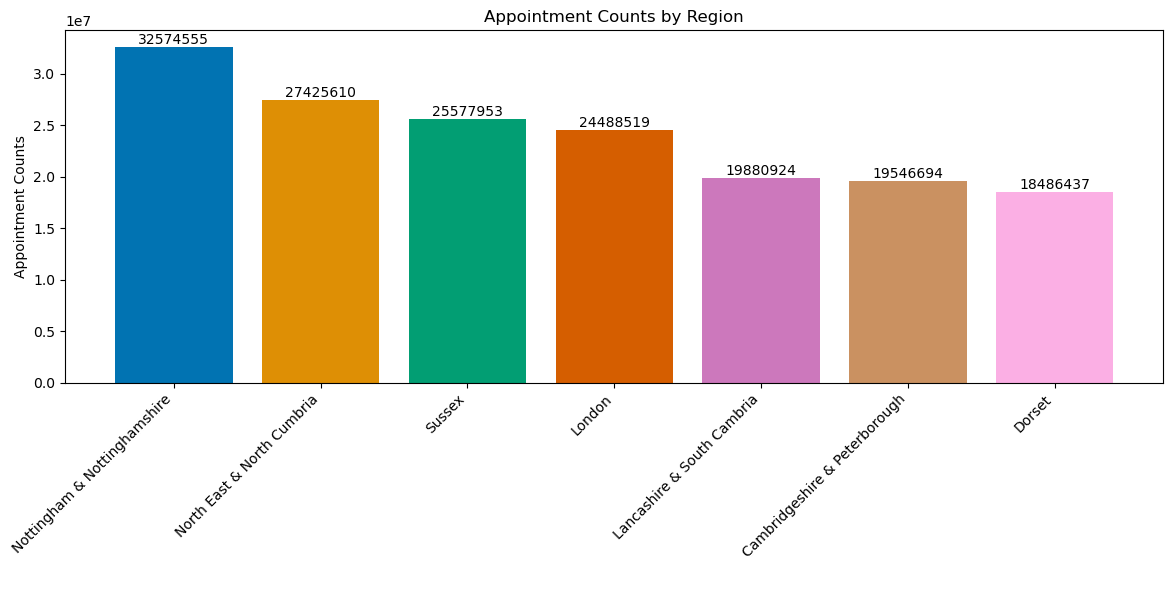

In [37]:
# Set palette to colorblind
sns.set_palette('colorblind')
colors = sns.color_palette()

# Plotting the counts of appointments by region
plt.figure(figsize=(12, 6))
bars = plt.bar(region_counts_sorted['region_names'],
        region_counts_sorted['count_of_appointments'],
              color=colors)

# Add counts labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height, '%d' % int(height),
             ha='center', va='bottom')

plt.xlabel(' ')
plt.ylabel('Appointment Counts')
plt.title('Appointment Counts by Region')
plt.xticks(rotation=45, ha='right')    # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Question 3:** How many service settings, context types, national categories, and appointment stati are there?

In [38]:
# Determine the number of service settings
nc_service_settings_counts = nc['service_setting'].value_counts()

# Print the number of unique service settings
print('Number of unique service settings:', len(nc_service_settings_counts))

# Print each unique service setting and its count
print('\nService Settings and their counts:')
print(nc_service_settings_counts)

Number of unique service settings: 5

Service Settings and their counts:
service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64


In [39]:
# Determine the number of context types
nc_context_type_counts = nc['context_type'].value_counts()

# Print the number of unique context types
print('Number of unique context types:', len(nc_context_type_counts))

# Print each unique context type and their count
print('\nContext Type and their counts:')
print(nc_context_type_counts)

Number of unique context types: 3

Context Type and their counts:
context_type
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: count, dtype: int64


In [40]:
# Determine the number of national categories
nc_national_category_counts = nc['national_category'].value_counts()

# Print the number of unique national categories
print('Number of unique national categories is:',
      len(nc_national_category_counts))

# Print each unique national categories and their count
print('\nNational Categories and their counts:')
#print(nc_national_category_counts)

Number of unique national categories is: 18

National Categories and their counts:


Reorganising the categories into different types of activities and services into broader groups based on their nature and purpose. Making them more manageable/suitable for visualisation.

#### Consultations and Clinics:
* General Consultation Routine
* Planned Clinics
* Clinical Triage
* Planned Clinical Procedure
* Structured Medication Review
* Group Consultation and Group Education

#### Specialised Services:
* Service provided by organisation external to the practice
* Home Visit
* Care Home Visit
* Care Home Needs Assessment & Personalised Care and Support Planning
* Social Prescribing Service
* Non-contractual chargeable work

#### Urgent or Unplanned Care:
* Unplanned Clinical Activity
* General Consultation Acute
* Patient contact during Care Home Round
* Walk-in

#### Unmapped:
* Unmapped




In [41]:
# Define mapping dictionary for reorganising categories
category_mapping = {
    'General Consultation Routine': 'Consultations and Clinics',
    'Planned Clinics': 'Consultations and Clinics',
    'Clinical Triage': 'Consultations and Clinics',
    'Planned Clinical Procedure': 'Consultations and Clinics',
    'Structured Medication Review': 'Consultations and Clinics',
    'Group Consultation and Group Education': 'Consultations and Clinics',
    'Service provided by organisation external to the practice': 'Specialised Services',
    'Home Visit': 'Specialised Services',
    'Care Home Visit': 'Specialised Services',
    'Care Home Needs Assessment & Personalised Care and Support Planning': 'Specialised Services',
    'Social Prescribing Service': 'Specialised Services',
    'Non-contractual chargeable work': 'Specialised Services',
    'Unplanned Clinical Activity': 'Urgent or Unplanned Care',
    'General Consultation Acute': 'Urgent or Unplanned Care',
    'Patient contact during Care Home Round': 'Urgent or Unplanned Care',
    'Walk-in': 'Urgent or Unplanned Care',
    'Unmapped': 'Unmapped',
    'Inconsistent Mapping': 'Inconsistent Mapping'
}

# Apply mapping to create new column with umbrella categories
nc['umbrella_category'] = nc['national_category'].replace(category_mapping)

# Check the result
print(nc[['national_category', 'umbrella_category']].head())

                        national_category          umbrella_category
0  Patient contact during Care Home Round   Urgent or Unplanned Care
1                         Planned Clinics  Consultations and Clinics
2                              Home Visit       Specialised Services
3              General Consultation Acute   Urgent or Unplanned Care
4            Structured Medication Review  Consultations and Clinics


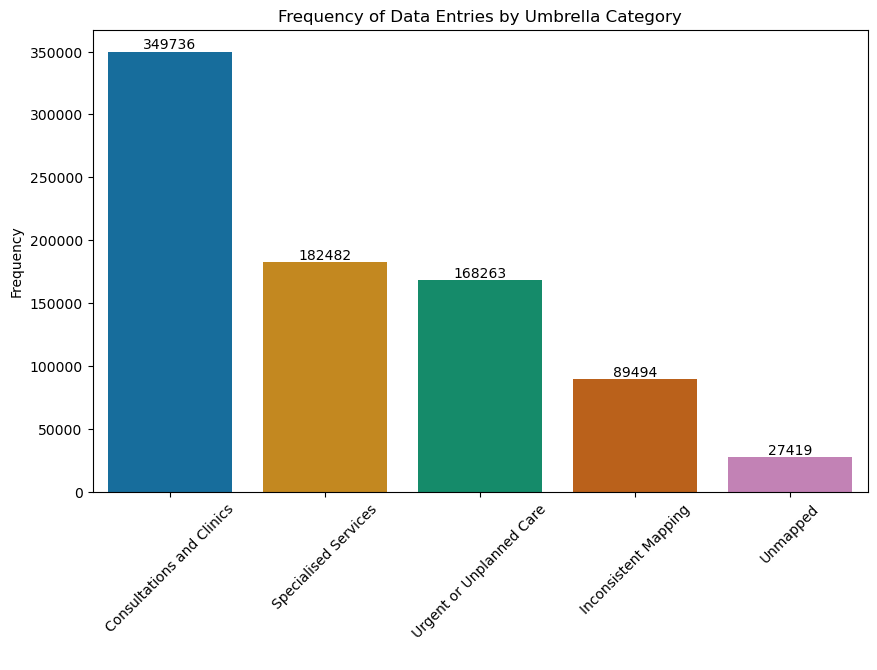

In [42]:
# Count the occurrences of each umbrella category
umbrella_category_counts = nc['umbrella_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=umbrella_category_counts.index,
            y=umbrella_category_counts.values)
plt.xticks(rotation=45)
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.title('Frequency of Data Entries by Umbrella Category')

# Add counts on top of each bar for better legibility
for index, value in enumerate(umbrella_category_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Check for 'Inconsistent Mapping' in nc DataFrame to confirm correct count: 89494 - as per barchart above

In [43]:
# Check for rows where 'national_category' is 'Inconsistent Mapping'
inconsistent_mapping = nc[nc['national_category'] == 'Inconsistent Mapping']

# Check if there are rows with 'Inconsistent Mapping', and how many
if inconsistent_mapping.empty:
    print("No occurrences of 'Inconsistent Mapping' found.")
else:
    num_occurrences = len(inconsistent_mapping)
    print(f"Total occurrences of 'Inconsistent Mapping': {num_occurrences}")

Total occurrences of 'Inconsistent Mapping': 89494


#### Determine percentage of Inconsistently or fully Unmapped occurences

In [44]:
# Filter the DataFrame to include only rows with 'unmapped' or 'inconsistent mapping'
nc_filtered = nc[nc['umbrella_category'].isin(['Unmapped', 'Inconsistent Mapping'])]

# Calculate the total count of appointments for 'unmapped' and 'inconsistent mapping'
combined_count = nc_filtered['count_of_appointments'].sum()

# Calculate the total count of appointments in the entire DataFrame
total_count = nc['count_of_appointments'].sum()

# Calculate the combined percentage
combined_percentage = (combined_count / total_count) * 100

print(f"Combined Percentage of 'Unmapped' and 'Inconsistent Mapping' in nc is: {combined_percentage:.2f}%")

Combined Percentage of 'Unmapped' and 'Inconsistent Mapping' in nc is: 13.16%


**Conclusion** : A 13.16% rate of inconsistent/unmapped appointments for the nc DataFrame is significant, because it means nearly one in eight appointments goes unaccounted for. This impacts healthcare efficiency, resource allocation, and patient care. 

**Question 4:** How many appointment stati, appointment modes, and HCP types are there?

In [45]:
# Determine the number of appointment stati
ar_appointment_status_counts = ar['appointment_status'].value_counts()

# Print the number of unique appointment stati
print('Number of unique appointment stati:', len(ar_appointment_status_counts))

# Print each unique appointment stati and their count
print('\nAppointment Stati and their counts:')
print(ar_appointment_status_counts)

Number of unique appointment stati: 3

Appointment Stati and their counts:
appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64


In [46]:
# Determine the number of appointment modes
ar_appointment_mode_counts = ar['appointment_mode'].value_counts()

# Print the number of unique appointment modes
print('Number of unique appointment modes:', len(ar_appointment_mode_counts))

# Print each unique appointment modes and their count
print('\nAppointment Modes and their counts:')
print(ar_appointment_mode_counts)

Number of unique appointment modes: 5

Appointment Modes and their counts:
appointment_mode
Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: count, dtype: int64


In [47]:
# Determine the number of HCP types
ar_hcp_type_counts = ar['hcp_type'].value_counts()

# Print the number of unique HCP types
print('Number of unique HCP types:', len(ar_hcp_type_counts))

# Print each unique HCP types and their count
print('\nHCP types and their counts:')
print(ar_hcp_type_counts)

Number of unique HCP types: 3

HCP types and their counts:
hcp_type
Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: count, dtype: int64


## 3) Assignment activity 3
Continue your exploratory data analysis by answering the specific questions posed by the NHS as well as additional trends identified during data exploration. You can start by looking at the date range and the change in behaviour over time for the available data sources.

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [48]:
# Convert 'appointment_date' column to datetime format
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'],
                                         format='%Y-%m')

# Check the data types after conversion
#print(ar.dtypes)

In [49]:
# Determine the MIN and MAX dates in the nc DataFrame
# Applying dt.date to the datetime columns to extract date component only
print(f"The MIN date value for df National Categories is: {nc['appointment_date'].dt.date.min()}")
print(f"The MAX date value for df National Categories is: {nc['appointment_date'].dt.date.max()}")

# Determine the MIN and MAX dates in the ar DataFrame
# Applying dt.date to the datetime columns to extract date component only
print(f"The MIN date value for df Appointments Regional is: {ar['appointment_month'].dt.date.min()}")
print(f"The MAX date value for df Appointments Regional is: {ar['appointment_month'].dt.date.max()}")

# Determine the MIN and MAX dates in the ad DataFrame
# Applying dt.date to the datetime columns to extract date component only
print(f"The MIN date value for df Actual Duration is: {ad['appointment_date'].dt.date.min()}")
print(f"The MAX date value for df Actual Duration is: {ad['appointment_date'].dt.date.max()}")

The MIN date value for df National Categories is: 2021-08-01
The MAX date value for df National Categories is: 2022-06-30
The MIN date value for df Appointments Regional is: 2020-01-01
The MAX date value for df Appointments Regional is: 2022-06-01
The MIN date value for df Actual Duration is: 2021-12-01
The MAX date value for df Actual Duration is: 2022-06-30


**Question 2:** Which service settings were the most popular for NHS North West London from 1 January to 1 June 2022?

In [50]:
# Filter df National Categories nc for NHS North West London for the specified time period
nc_nwl = nc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') &
            (nc['appointment_date'] >= '2022-01-01') &
            (nc['appointment_date'] <= '2022-06-01')]

# Count occurrences per service setting
nc_nwl_service_counts = nc_nwl['service_setting'].value_counts()

# Query for top 5 service settings
top_nwl_service = nc_nwl_service_counts.head(5)

# Print the result
print(f'The Top 5 service settings for NHS North West London from\
 01 Jan to 01 Jun 2022 by value/record count are:\
                     {top_nwl_service}')    # Using odd spacing to adjust output format

The Top 5 service settings for NHS North West London from 01 Jan to 01 Jun 2022 by value/record count are:                     service_setting
General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: count, dtype: int64


#### Occurences/records vs count_of_appointments

In [51]:
# Group by 'service_setting' and sum the counts of appointments
nwl_grouped = nc_nwl.groupby('service_setting')[['count_of_appointments']]\
.sum().reset_index()

# Sort the data in descending order based on the count of appointments
nwl_grouped_sorted = nwl_grouped.sort_values(by='count_of_appointments',\
                                             ascending=False)

# Select the top 5 service settings
nwl_top_5 = nwl_grouped_sorted.head(5)

# Reset the index for proper display
nwl_top_5.reset_index(drop=True, inplace=True)

# Display the top 5 service settings
print(f'The Top 5 grouped service settings for NHS North West London from\
 01 Jan to 01 June 2022 by sum are:            {nwl_top_5}')    # Odd spacing to adjust format in output

The Top 5 grouped service settings for NHS North West London from 01 Jan to 01 June 2022 by sum are:                         service_setting  count_of_appointments
0           General Practice                4804239
1                   Unmapped                 391106
2                      Other                 152897
3       Primary Care Network                 109840
4  Extended Access Provision                  98159


#### Visualisation for occurences/records vs count of appointments for NHS North West London from 01 Jan to 01 June 2022

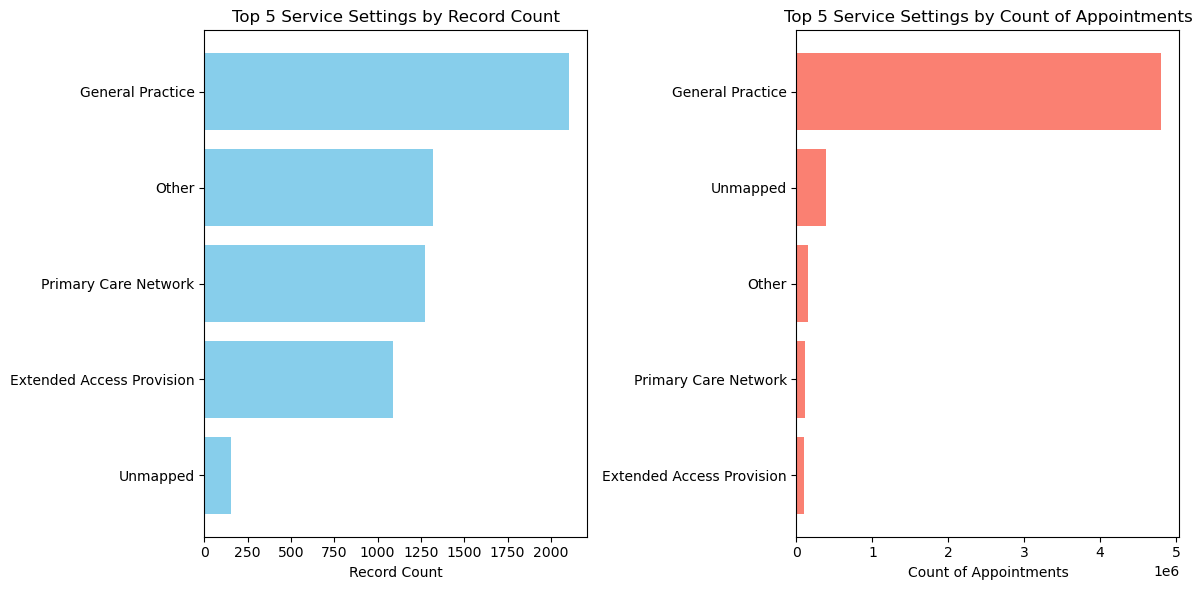

In [52]:
# Data for record count
service_settings_record_count = top_nwl_service.index[::-1]
record_count = top_nwl_service.values[::-1]

# Data for count of appointments
service_settings_appointments_count = nwl_top_5['service_setting'][::-1]
appointments_count = nwl_top_5['count_of_appointments'][::-1]

# Plotting 2 subplots for comparison
plt.figure(figsize=(12, 6))

# Plot for record count
plt.subplot(1, 2, 1)
plt.barh(service_settings_record_count,
         record_count, color='skyblue')
plt.xlabel('Record Count')
plt.title('Top 5 Service Settings by Record Count')

# Plot for count of appointments
plt.subplot(1, 2, 2)
plt.barh(service_settings_appointments_count,
         appointments_count, color='salmon')
plt.xlabel('Count of Appointments')
plt.title('Top 5 Service Settings by Count of Appointments')

plt.tight_layout()
plt.show()


**Conclusion:** 
* **General Practice** is the dominant service setting for both record count and count of appointments. The 'Other' category also holds significance across both analyses, implying a diverse range of services offered. 
* The **'Unmapped'** category exhibits a notable disjunction between record count and appointments, prompting investigation into potential data management discrepancies. 
* Insights for **business strategy** include the imperative to maintain and potentially expand General Practice services, while further exploration of the 'Other' category is warranted for understanding service demand. 
* Understanding the discrepancy in the 'Unmapped' category and recognising the consistent utilisation of **Primary Care Network** and **Extended Access Provision** settings highlight the need for strategic resource allocation and service planning efforts.

The distinction between ‘record count’ and ‘count of appointments’ is crucial because it reflects the granularity of the data being analysed. ‘Record count’ refers to the total number of entries in the dataset, while ‘count of appointments’ specifically focuses on the number of individual appointments, ensuring accuracy in statistical analysis and interpretation.

**Question 3:** Which month had the highest number of appointments?

In [53]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions
# Extract the month from the appointment date
sum1 = nc.loc[:,['count_of_appointments']].\
      groupby([nc['appointment_date'].dt.year,
               nc['appointment_date'].dt.month]).\
            sum().sort_values(by=['count_of_appointments'],
                              ascending=False).head (1)
sum1

,,count_of_appointments
appointment_date,appointment_date,
2021,11,30405070


**Question 4:** What was the total number of records per month for df National Categories from Aug 2021 to Jun 2022?

In [54]:
# Total number of records per month for df National Categories
# Count the records per month
records_per_month = nc.groupby('appointment_month').size()

# View the result
print('Total number of records per month:')
print(records_per_month)

Total number of records per month:
appointment_month
2021-08-01    69999
2021-09-01    74922
2021-10-01    74078
2021-11-01    77652
2021-12-01    72651
2022-01-01    71896
2022-02-01    71769
2022-03-01    82822
2022-04-01    70012
2022-05-01    77425
2022-06-01    74168
dtype: int64


**Additional Question:** Which day(s) are the busiest Weekdays? ('nc' DataFrame Aug 2021 - Jun 2022)

In [55]:
# Make a copy of 'nc' for weekday investigation
nc_weekday = nc.copy()

# Extract weekday from 'appointment_date'
nc_weekday['weekday'] = nc['appointment_date'].dt.day_name()

# Group by weekday and sum 'count_of_appointments'
weekday_counts = nc_weekday.groupby('weekday')\
['count_of_appointments'].sum().reset_index()

# Sort the result to find busiest weekdays
busy_weekdays = weekday_counts.sort_values(by='count_of_appointments',
                                           ascending=False)

# View
busy_weekdays

,weekday,count_of_appointments
5,Tuesday,61806933
1,Monday,59695267
6,Wednesday,58984265
4,Thursday,56976354
0,Friday,52394868
2,Saturday,5574922
3,Sunday,614161


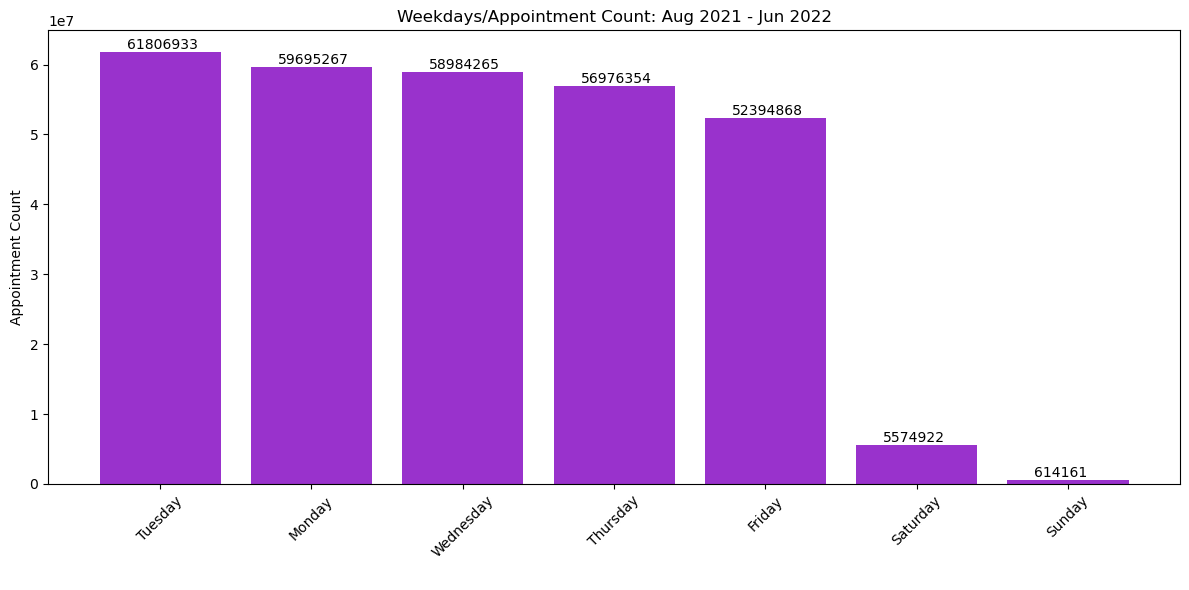

In [56]:
# Create a Barplot for visualisation of Weekday/Appointment Count
plt.figure(figsize=(12, 6))
bars = plt.bar(busy_weekdays['weekday'],
        busy_weekdays['count_of_appointments'],
        color='darkorchid')
plt.title('Weekdays/Appointment Count: Aug 2021 - Jun 2022')
plt.xlabel(' ')
plt.ylabel('Appointment Count')

# Add counts on top of each bar for better legibility
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/4.5, yval, int(yval), va='bottom')
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Note:** I kept encountering 'MemoryError: Unable to allocate 141. GiB for an array with shape (18915444108,) and data type int64'

I wanted to investigate DNA percentages for weeksdays, to determine which days are most likely to result in missed appointments. Upon further investigation, I uncovered that merging on icb_ons_code would still result in nc frequency of **218,231,621** vs ar frequency of **25,828,078** resulting in a **discrepancy of 192,403,543** - meaning that advanced statistical measures would have to be applied to generate meaningful results. Due to the scope of this assignment, I will not pursue this at this time. It should be included in future investigations though, as it will generate valuable insights for scheduling considerations.

## 4) Assignment activity 4
Use visual techniques to explore and communicate patterns in the data. Note that you will likely revisit this section when preparing the final visualisations to be used in your technical report and business presentation. Make sure to document your thoughts and observations as they relate to various potential stakeholders.

The seasons are:
* Summer (June to August 2021)
* Autumn (September to November 2021)
* Winter (December to February 2022)
* Spring (March to May 2022).

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [57]:
# Set the plot style as white
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [58]:
# Aggregate on monthly level and determine the sum of records per month
# Create a new DataFrame
nc_appointments = nc.groupby('appointment_month').\
aggregate({'count_of_appointments': 'sum'}) \
.reset_index().copy()

# View output
#nc_appointments

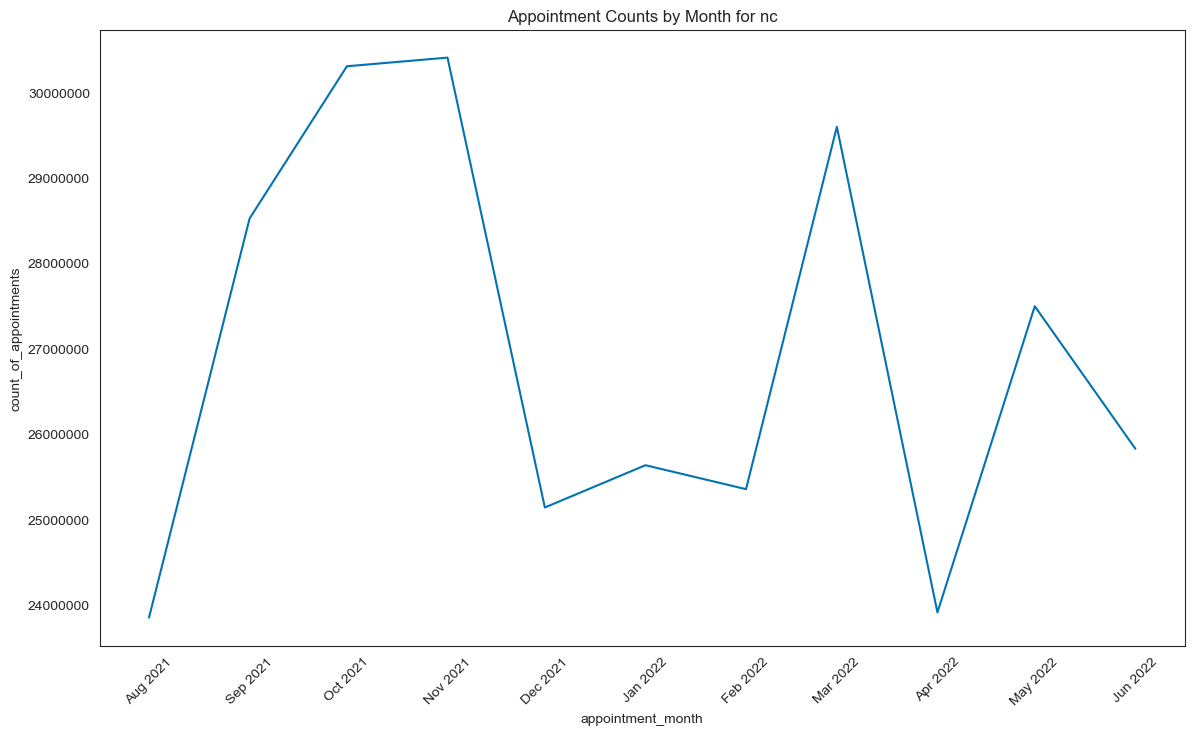

In [59]:
# Lineplot showing appointments by month
plt.figure(figsize=(14, 8))
ax = sns.lineplot(x='appointment_month',
                  y='count_of_appointments',
                  data=nc_appointments, estimator=None)
ax.set_title('Appointment Counts by Month for nc')

# Set date format for x axis
date_format = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)

# Adjust label and decimal
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',
                     axis='y', useOffset=False)
plt.show()

**Service settings:**


In [60]:
# Aggregate the data by 'service_setting' and calculate the total count of appointments for each setting
service_agg_nc = nc.groupby('service_setting')['count_of_appointments']\
.sum().reset_index()

# Sort the aggregated data by the total count of appointments in descending order
service_agg_sorted = service_agg_nc.sort_values(by='count_of_appointments',
                                                ascending=False)

# Take only the top 5 service settings
top_service_settings_desc = service_agg_sorted.head(5)

# View output
print(top_service_settings_desc)

             service_setting  count_of_appointments
1           General Practice              270811691
4                   Unmapped               11080810
3       Primary Care Network                6557386
2                      Other                5420076
0  Extended Access Provision                2176807


In [61]:
# Aggregate the data on a monthly level for each category
# Create a separate dataset that can be used in future weeks
service_agg = nc.groupby(['appointment_month', 'service_setting'])\
['count_of_appointments'].sum().reset_index()

# View output
service_agg.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,160927
1,2021-08-01,General Practice,21575852
2,2021-08-01,Other,449101
3,2021-08-01,Primary Care Network,432448
4,2021-08-01,Unmapped,1233843


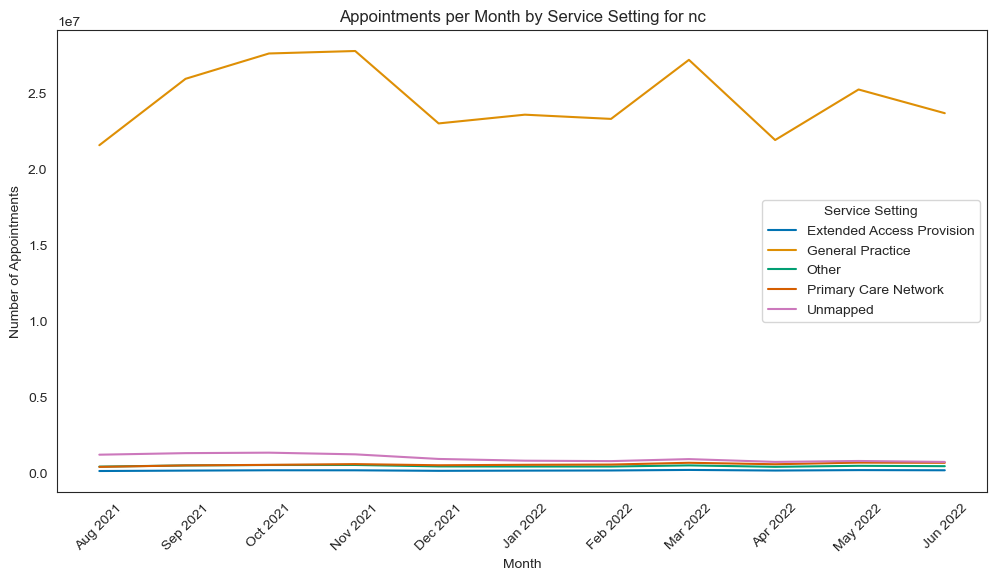

In [62]:
# Service settings - lineplot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='service_setting', data=service_agg)
plt.title('Appointments per Month by Service Setting for nc')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')

# Set date format for x axis
date_format = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)
plt.legend(title='Service Setting')
plt.show()

**Context types:**

In [63]:
# Aggregate the data on a monthly level for each category
# Create a separate dataset that can be used in future weeks
context_types_agg = nc.groupby(['appointment_month', 'context_type'])\
['count_of_appointments'].sum().reset_index()

# View output
context_types_agg.head()

,appointment_month,context_type,count_of_appointments
0,2021-08-01,Care Related Encounter,20255235
1,2021-08-01,Inconsistent Mapping,2363093
2,2021-08-01,Unmapped,1233843
3,2021-09-01,Care Related Encounter,24404251
4,2021-09-01,Inconsistent Mapping,2782135


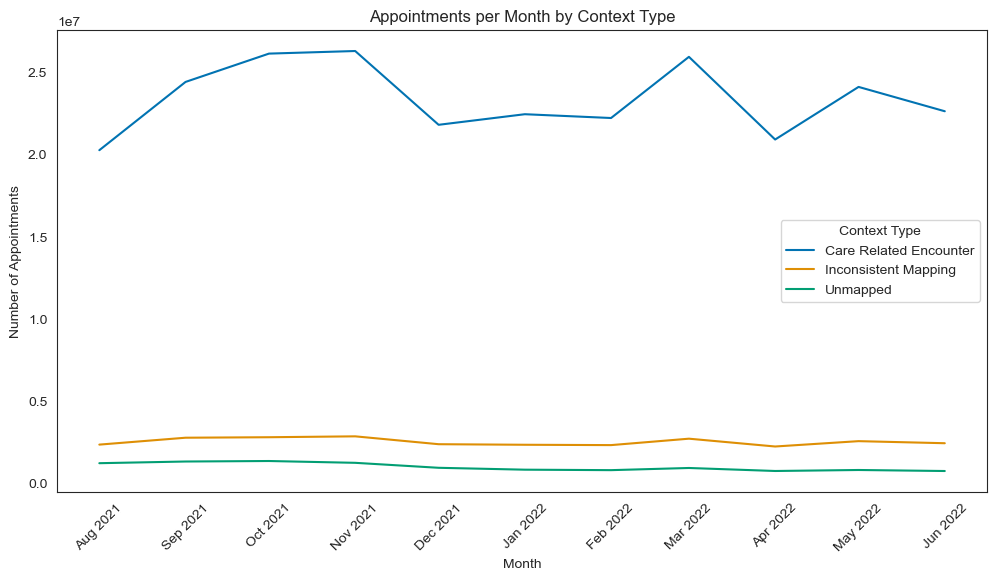

In [64]:
# Context types - lineplot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',
             hue='context_type', data=context_types_agg)
plt.title('Appointments per Month by Context Type')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')

# Set date format for x axis
date_format = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)
plt.legend(title='Context Type')
plt.show()

In [65]:
# Create a separate data set that can be used in future weeks
# Group by appointment month and context type and calculate the sum of appointments
nc_context = nc.groupby(['appointment_month', 'context_type']) \
['count_of_appointments'].sum().reset_index()

# Pivot the data to have appointment month as index and context types as columns
context_type_pivot = nc_context.pivot(index='appointment_month', \
                                               columns='context_type', values='count_of_appointments').fillna(0)

# Save the pivot table to a new dataset
context_type_pivot.to_csv('context_type_appointments.csv')

# View the output
context_type_pivot.head()

context_type,Care Related Encounter,Inconsistent Mapping,Unmapped
appointment_month,,,
2021-08-01,20255235,2363093,1233843
2021-09-01,24404251,2782135,1336115
2021-10-01,26125201,2811977,1366656
2021-11-01,26282778,2865796,1256496
2021-12-01,21798612,2387907,954257


**National categories:**

In [66]:
# Aggregate the data on a monthly level for each category
# Create a separate dataset that can be used in future weeks
nc_agg = nc.groupby(['appointment_month', 'national_category'])\
['count_of_appointments'].sum().reset_index()

# View output
nc_agg.head()

,appointment_month,national_category,count_of_appointments
0,2021-08-01,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08-01,Care Home Visit,47583
2,2021-08-01,Clinical Triage,3704207
3,2021-08-01,General Consultation Acute,4280920
4,2021-08-01,General Consultation Routine,7756045


In [67]:
# Group the DataFrame by 'national_category' and calculate the sum of 'count_of_appointments' for each category
category_totals = nc.groupby('national_category')['count_of_appointments'].sum()

# Sort the result in descending order
category_totals_sorted = category_totals.sort_values(ascending=False)

# Display the result
#print(category_totals_sorted)
category_totals_sorted.head(5)

national_category
General Consultation Routine    97271522
General Consultation Acute      53691150
Clinical Triage                 41546964
Planned Clinics                 28019748
Inconsistent Mapping            27890802
Name: count_of_appointments, dtype: int64

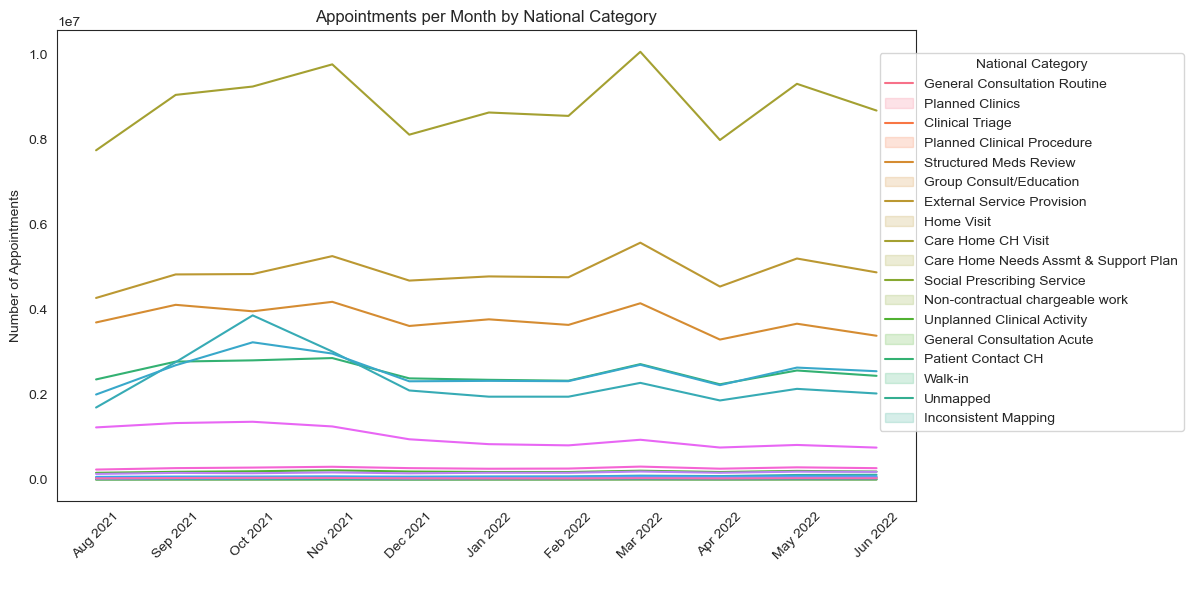

In [68]:
# Define a dictionary to map original labels to shorter labels
label_mapping = {
    'General Consultation Routine': 'General Consultation Routine',
    'Planned Clinics': 'Planned Clinics',
    'Clinical Triage': 'Clinical Triage',
    'Planned Clinical Procedure': 'Planned Clinical Procedure',
    'Structured Medication Review': 'Structured Meds Review',
    'Group Consultation and Group Education': 'Group Consult/Education',
    'Service provided by organisation external to the practice': 'External Service Provision',
    'Home Visit': 'Home Visit',
    'Care Home Visit': 'Care Home CH Visit',
    'Care Home Needs Assessment & Personalised Care and Support Planning': 'Care Home Needs Assmt & Support Plan',
    'Social Prescribing Service': 'Social Prescribing Service',
    'Non-contractual chargeable work': 'Non-contractual chargeable work',
    'Unplanned Clinical Activity': 'Unplanned Clinical Activity',
    'General Consultation Acute': 'General Consultation Acute',
    'Patient contact during Care Home Round': 'Patient Contact CH',
    'Walk-in': 'Walk-in',
    'Unmapped': 'Unmapped',
    'Inconsistent Mapping': 'Inconsistent Mapping'
}

# National categories - lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='national_category', data=nc_agg)
plt.title('Appointments per Month by National Category')
plt.xlabel(' ')
plt.ylabel('Number of Appointments')
date_formatter = mdates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)

# Get current axes and position the legend next to it
ax = plt.gca()
ax.legend(title='National Category', bbox_to_anchor=(0.95, 0.55),\
          loc='center left', labels=label_mapping.values())

plt.tight_layout()
plt.show()

**Note on the legend:** I have tried to adjust the setting, so all legend markers show as lines, however, any code adjustment I tried led to something else changing unexpectedly...

**Additional Investigation:** Appointment Mode Trends by Year for 2020, 2021, and 2022

In [69]:
# Filter data for each year
ar_2020 = ar[ar['appointment_month'].dt.year == 2020]
ar_2021 = ar[ar['appointment_month'].dt.year == 2021]
ar_2022 = ar[ar['appointment_month'].dt.year == 2022]

# Group data by 'appointment_month' and 'appointment_mode' and sum up the counts
ar_2020_grouped = ar_2020.groupby(['appointment_month',
                                   'appointment_mode']).sum().reset_index()
ar_2021_grouped = ar_2021.groupby(['appointment_month',
                                   'appointment_mode']).sum().reset_index()
ar_2022_grouped = ar_2022.groupby(['appointment_month',
                                   'appointment_mode']).sum().reset_index()

# Pivot the data for plotting
ar_2020_pivot = ar_2020_grouped.pivot(index='appointment_month',
                                      columns='appointment_mode',
                                      values='count_of_appointments').fillna(0)
ar_2021_pivot = ar_2021_grouped.pivot(index='appointment_month',
                                      columns='appointment_mode',
                                      values='count_of_appointments').fillna(0)
ar_2022_pivot = ar_2022_grouped.pivot(index='appointment_month',
                                      columns='appointment_mode',
                                      values='count_of_appointments').fillna(0)

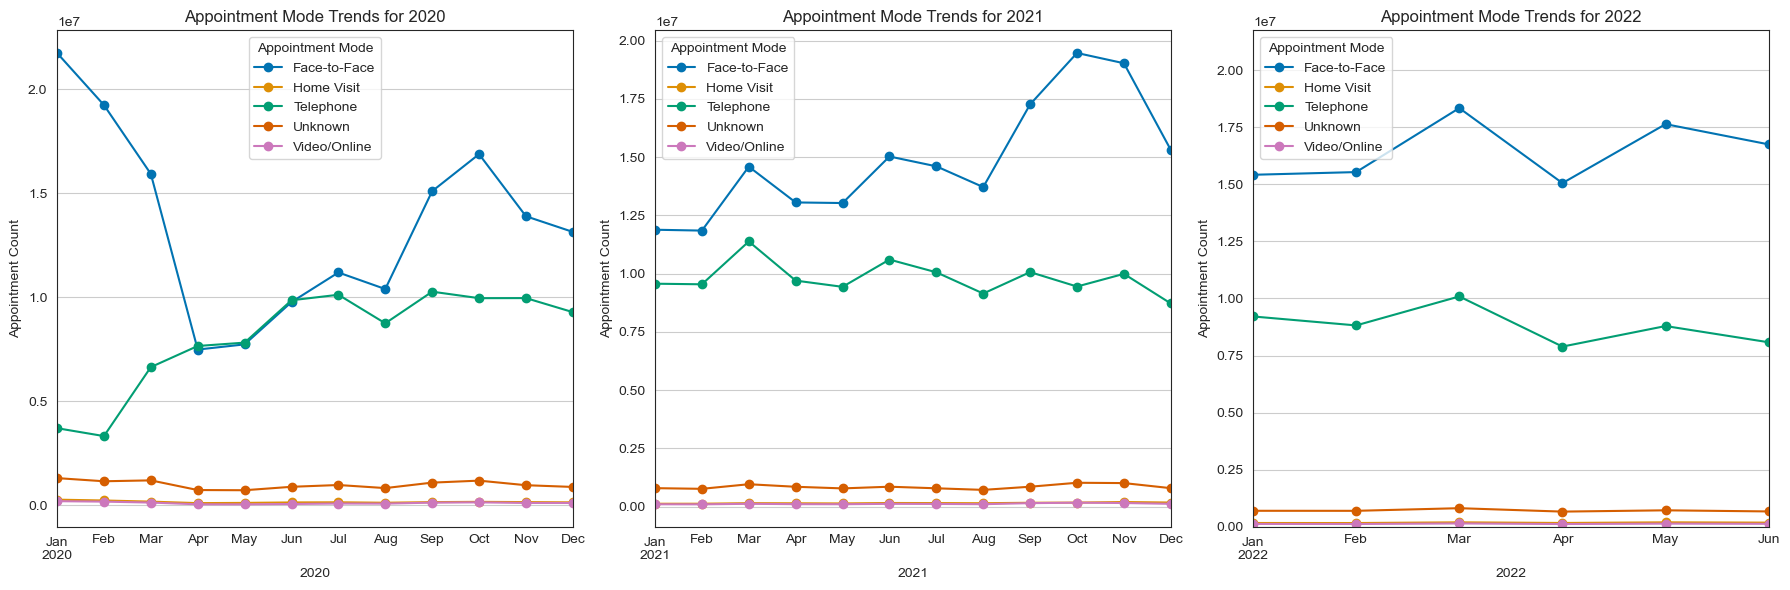

In [70]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting for 2020
ar_2020_pivot.plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Appointment Mode Trends for 2020')
axes[0].set_xlabel('2020')
axes[0].set_ylabel('Appointment Count')
axes[0].grid(True)
axes[0].legend(title='Appointment Mode')
axes[2].set_ylim([0, max(ar_2020_pivot.max().max(),
                         ar_2021_pivot.max().max(),
                         ar_2022_pivot.max().max())])

# Plotting for 2021
ar_2021_pivot.plot(kind='line', marker='o', ax=axes[1])
axes[1].set_title('Appointment Mode Trends for 2021')
axes[1].set_xlabel('2021')
axes[1].set_ylabel('Appointment Count')
axes[1].grid(True)
axes[1].legend(title='Appointment Mode')
axes[2].set_ylim([0, max(ar_2020_pivot.max().max(),
                         ar_2021_pivot.max().max(),
                         ar_2022_pivot.max().max())])

# Plotting for 2022
ar_2022_pivot.plot(kind='line', marker='o', ax=axes[2])
axes[2].set_title('Appointment Mode Trends for 2022')
axes[2].set_xlabel('2022')
axes[2].set_ylabel('Appointment Count')
axes[2].grid(True)
axes[2].legend(title='Appointment Mode')
axes[2].set_ylim([0, max(ar_2020_pivot.max().max(),
                         ar_2021_pivot.max().max(),
                         ar_2022_pivot.max().max())])

plt.tight_layout()
plt.show()

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.
* Summer: June 2021 to August 2021
* Autumn: September 2021 to November 2021
* Winter: December 2021 to February 2022
* Spring: March 2022 to May 2022

In [71]:
# Define the ranges for each season
summer_range = ('2021-06-01', '2021-08-31')
autumn_range = ('2021-09-01', '2021-11-30')
winter_range = ('2021-12-01', '2022-02-28')
spring_range = ('2022-03-01', '2022-05-31')

**Summer:**


In [72]:
# Create a separate data set that can be used in future weeks
summer_data = nc[(nc['appointment_date'] >= summer_range[0])\
                 & (nc['appointment_date'] <= summer_range[1])]

# Aggregate data for Summer
summer_agg = summer_data.groupby(['service_setting', 'appointment_date'])\
['count_of_appointments'].sum().reset_index()

# View the output
summer_agg.head()

,service_setting,appointment_date,count_of_appointments
0,Extended Access Provision,2021-08-01,438
1,Extended Access Provision,2021-08-02,7705
2,Extended Access Provision,2021-08-03,7820
3,Extended Access Provision,2021-08-04,6917
4,Extended Access Provision,2021-08-05,6841


**Note:** Date range: missing elements

I was going to substitute the missing date range in the nc DataFrame, by joining nc and ar. However, since ar does not contain 'service_settings' information and hence data integrity could not be established, I'll be checking how many appointments were present in ar for the missing date range. The sum constitutes the total of missing data for nc, for the specified Summer period.

In [73]:
# Filter ar dataframe for the specified date range
filtered_ar = ar[(ar['appointment_month'] >= '2021-06-01') & (ar['appointment_month'] <= '2021-07-31')]

# Calculate the sum of appointments
sum_of_appointments = filtered_ar['count_of_appointments'].sum()

# Print the result
print('Sum of appointments for 2021-06-01 to 2021-07-31:',
      sum_of_appointments)

Sum of appointments for 2021-06-01 to 2021-07-31: 52523401


A total of **52523401** appointments is **excluded from Summer period**, due to being absent from nc dataframe. This carries repercussions for comparability of Summer against the other seasonal periods.

**Autumn:**

In [74]:
# Create a separate data set that can be used in future weeks
autumn_data = nc[(nc['appointment_date'] >= autumn_range[0])\
                 & (nc['appointment_date'] <= autumn_range[1])]

# Aggregate data for Autumn
autumn_agg = autumn_data.groupby(['service_setting', 'appointment_date'])\
['count_of_appointments'].sum().reset_index()

# View the output
autumn_agg.head()

,service_setting,appointment_date,count_of_appointments
0,Extended Access Provision,2021-09-01,6916
1,Extended Access Provision,2021-09-02,7223
2,Extended Access Provision,2021-09-03,6324
3,Extended Access Provision,2021-09-04,2556
4,Extended Access Provision,2021-09-05,487


**Winter:**

In [75]:
# Create a separate data set that can be used in future weeks
winter_data = nc[(nc['appointment_date'] >= winter_range[0])\
                 & (nc['appointment_date'] <= winter_range[1])]

# Aggregate data for Winter
winter_agg = winter_data.groupby(['service_setting',
                                  'appointment_date'])\
['count_of_appointments'].sum().reset_index()

# View the output
winter_agg.head()

,service_setting,appointment_date,count_of_appointments
0,Extended Access Provision,2021-12-01,8500
1,Extended Access Provision,2021-12-02,8023
2,Extended Access Provision,2021-12-03,7073
3,Extended Access Provision,2021-12-04,3751
4,Extended Access Provision,2021-12-05,557


**Spring:**

In [76]:
# Create a separate data set that can be used in future weeks
spring_data = nc[(nc['appointment_date'] >= spring_range[0])\
                 & (nc['appointment_date'] <= spring_range[1])]

# Aggregate data for Spring
spring_agg = spring_data.groupby(['service_setting', 'appointment_date'])\
['count_of_appointments'].sum().reset_index()

# View the output
spring_agg.head()

,service_setting,appointment_date,count_of_appointments
0,Extended Access Provision,2022-03-01,10082
1,Extended Access Provision,2022-03-02,9660
2,Extended Access Provision,2022-03-03,9384
3,Extended Access Provision,2022-03-04,8007
4,Extended Access Provision,2022-03-05,3292


### Combined seasonal plots

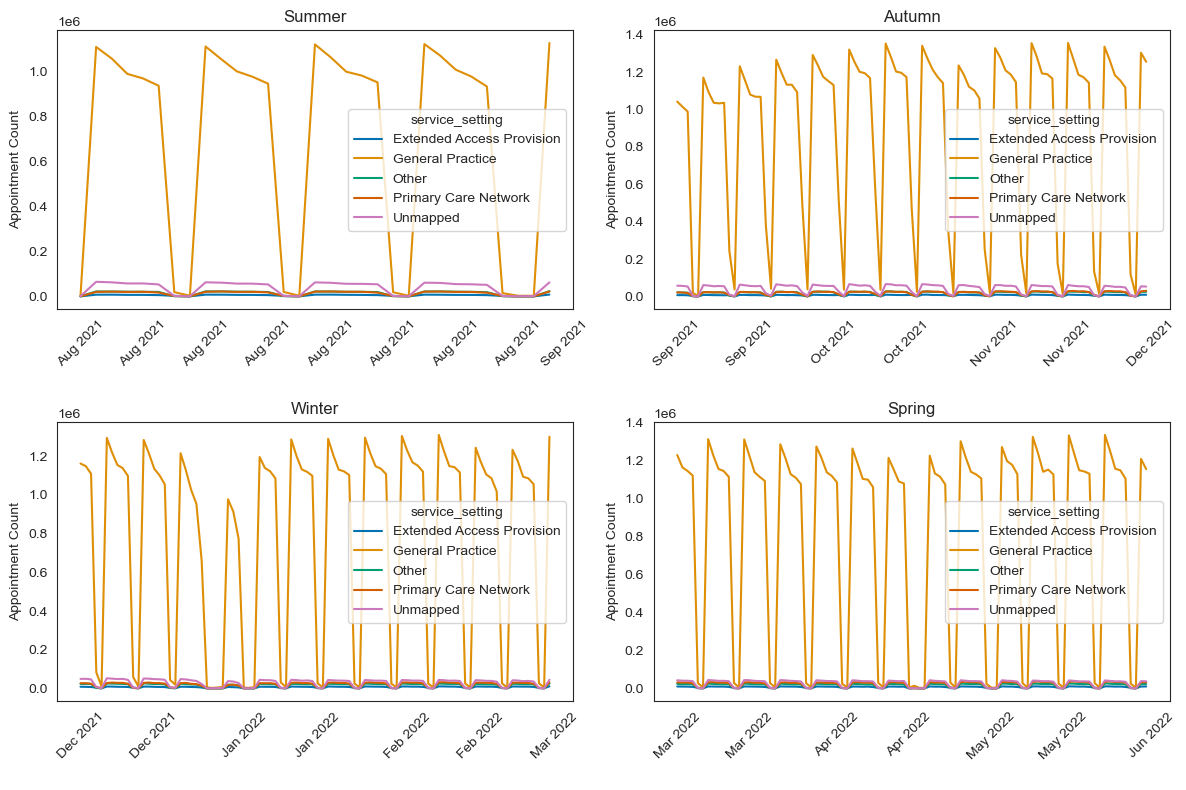

In [77]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Define date format
date_format = mdates.DateFormatter('%b %Y')

# Plot for Summer
sns.lineplot(ax=axs[0, 0], x='appointment_date',
             y='count_of_appointments',
             hue='service_setting', data=summer_agg)
axs[0, 0].set_title('Summer')
axs[0, 0].set_xlabel(' ')
axs[0, 0].set_ylabel('Appointment Count')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].xaxis.set_major_formatter(date_format)  # Set date format

# Plot for Autumn
sns.lineplot(ax=axs[0, 1], x='appointment_date',
             y='count_of_appointments', 
             hue='service_setting', data=autumn_agg)
axs[0, 1].set_title('Autumn')
axs[0, 1].set_xlabel(' ')
axs[0, 1].set_ylabel('Appointment Count')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].xaxis.set_major_formatter(date_format)  # Set date format

# Plot for Winter
sns.lineplot(ax=axs[1, 0], x='appointment_date',
             y='count_of_appointments', 
             hue='service_setting', data=winter_agg)
axs[1, 0].set_title('Winter')
axs[1, 0].set_xlabel(' ')
axs[1, 0].set_ylabel('Appointment Count')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].xaxis.set_major_formatter(date_format)  # Set date format

# Plot for Spring
sns.lineplot(ax=axs[1, 1], x='appointment_date',
             y='count_of_appointments', 
             hue='service_setting', data=spring_agg)
axs[1, 1].set_title('Spring')
axs[1, 1].set_xlabel(' ')
axs[1, 1].set_ylabel('Appointment Count')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].xaxis.set_major_formatter(date_format)  # Set date format

plt.tight_layout()
plt.show()

## 5) Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [78]:
# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [79]:
# Load the data set
tweets = pd.read_csv('tweets.csv')

# View the DataFrame
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1.570000e+18,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UltimaLionsDen', 'name': ""Ultima Lions' Den"", 'id': 973581329119039488, 'id_str': '973581329119039488', 'indices': [3, 18]}], 'ur...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",303,0,False,False,en
1,1.570000e+18,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
2,1.570000e+18,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
3,1.570000e+18,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
4,1.570000e+18,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en


In [80]:
# Explore the metadata and data set
#tweets.dtypes
#tweets.info()
#tweets.describe()

**Note:** Since 'tweet_favorited' and 'tweet_retweeted' contain 'False' throughout, these columns are dropped. In a real-life scenario, I would investigate why/how this happened and seek to acquire full dataset for further investigation. However, this is beyond the remit of this assignment.

In [81]:
# Drop two columns by name
tweets = tweets.drop(['tweet_favorited', 'tweet_retweeted'], axis=1)
#tweets.head()

In [82]:
# Create new df and check for missing values
tweets_na = tweets.isna()
tweets_na = tweets_na.isnull().sum()
print(tweets_na)

tweet_id                   0
tweet_full_text            0
tweet_entities             0
tweet_entities_hashtags    0
tweet_metadata             0
tweet_retweet_count        0
tweet_favorite_count       0
tweet_lang                 0
dtype: int64


In [83]:
# Determine total number of tweets
len(tweets)

1174

### Would it be useful to only look at retweeted and favourited tweet messages?
**Explain your answer:** In this particular case it would not make any sense to only look at 'tweet_favourited' or 'tweet_retweeted', because both of these columns are marked 'False' - in their entirety.


For 'tweet_retweet_count' and 'tweet_favorite_count', all observations must be considered and analysed, because tweets, or groups of tweets with particularly low scores will allow us to generate further insights and may lead to valuable recommendations that can drive future business decisions.

In [84]:
# Create a new DataFrame containing only the text
tweet_txt = tweets[['tweet_full_text']]

# View the DataFrame
tweet_txt.head()

,tweet_full_text
0,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…
1,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…"
2,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…"
3,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…"
4,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…"


In [85]:
# Loop through the messages, and create a list of values containing the # symbol
# Create the new variable (list) to store the defined tags
tags = []

# Apply for loop
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase
            tags.append(z.lower())

In [86]:
# Create a hastags series
hashtags = pd.Series(tags)

# View series
hashtags.head()

0    #tipsfornewdocs
1             #meded
2        #medtwitter
3          #medicine
4           #medical
dtype: object

In [87]:
# Display the first 30 records and their count
hashtags_count = hashtags.value_counts().reset_index()
hashtags_count.head()

,index,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [88]:
# Convert the series to a DataFrame in preparation for visualisation
# Renaming columns for better legibility
hashtags_df = hashtags_count.rename(columns={'index': 'tag',
                                             'count': 'count'})

# Display the DataFrame
hashtags_df.head()

,tag,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


~~Fix the count datatype~~
~~View the result~~

In [89]:
# dtype already in correct format
hashtags_df.dtypes

tag      object
count     int64
dtype: object

In [90]:
#hashtags_df.head(47)

In [91]:
# Display records where the count is larger than 10
hashtags_10 = (hashtags_df.loc[(hashtags_df['count']) > 10])
hashtags_10.head()    # only 47 out of 1174 hashtags have a count over 10

,tag,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


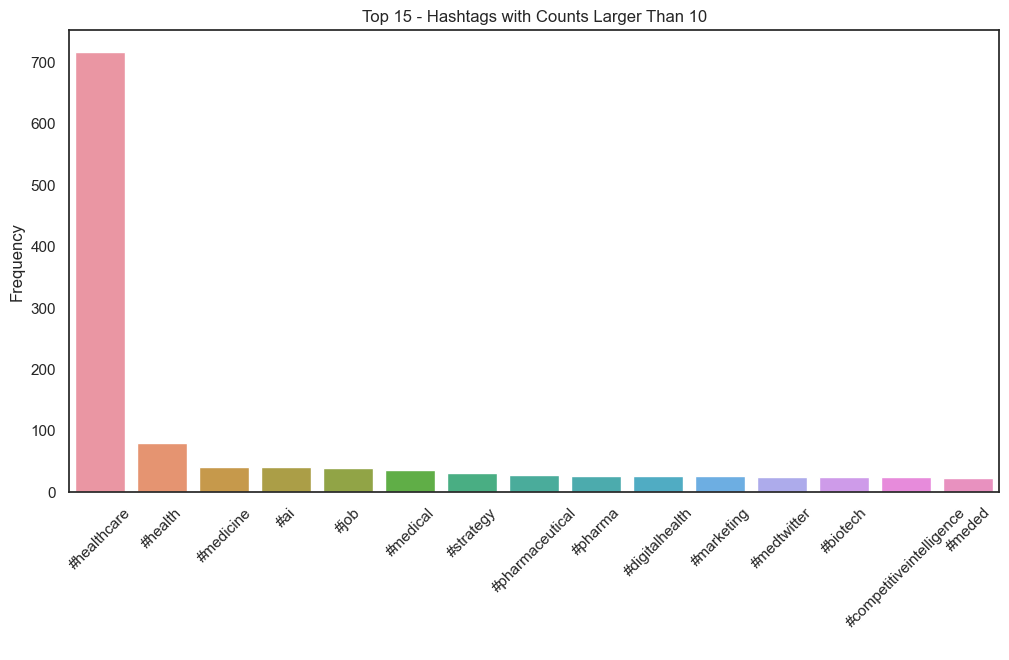

In [92]:
# Create a Seaborn barplot displaying all records with a count larger than 10
# Limiting displayed items to 15, to avoid chart being cluttered

# Select the first 15 rows from the DataFrame
hashtags_10 = hashtags_df.head(15)

# Create barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='tag', y='count', data=hashtags_10)
plt.title('Top 15 - Hashtags with Counts Larger Than 10')
plt.xticks(rotation=45)
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

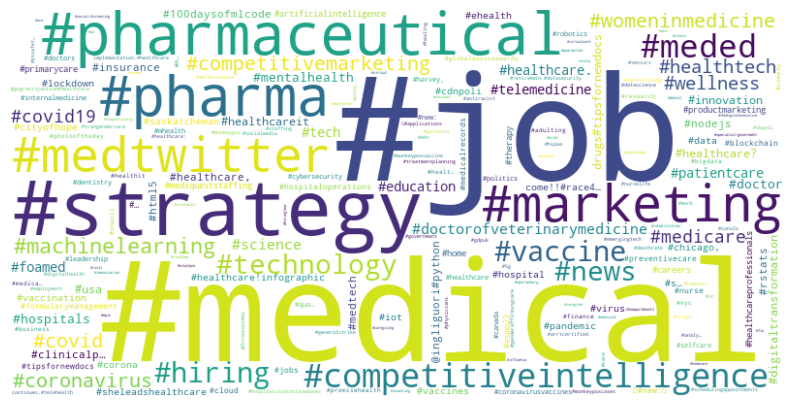

In [93]:
# Remove newline characters from hashtags
hashtags_df['tag'] = hashtags_df['tag'].str.replace('\n', '')

# Generate the Wordcloud
wordcloud_data = dict(zip(hashtags_df['tag'],
                          hashtags_df['count']))
wordcloud = WordCloud(width=800, height=400,
                      background_color='white')\
.generate_from_frequencies(wordcloud_data)

# Display the Wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Conclusion:** 
* There is no NHS hashtag
* Tweets include #Veterinary, which does not apply to humans directly
* The #USA is not applicable 

Umbrella categories:
* Healthcare Services and Facilities: hospitals, patientcare, nurses, medicare
* Medical Practices: health, medical, digitalhealth, healthtech, telehealth, mentalhealth, wellness
* Pharma: medicine, pharmaceutical, pharma, telemedicine
* covid specific: covid, covid19, coronavirus, (vaccine)
* technology: ai, machinelearning, technology, tech, digitaltransformation
* marketing: marketing, strategy, competitiveintelligence, competitivemarketing, innovation
* education: meded, foamed, education
* professional_communities: medtwitter, biotech, doctorofveterinarymedicine, doctor, usa
* current_events: news


Insights into tweet cohesion and reach could be gained by analysing which hashtags tend to appear together frequently. Hashtags that co-occur frequently may indicate cohesive discussions around specific topics or events. Analysing the reach of tweets with different hashtags can provide insights into the engagement levels and audience interests in various topics. Additionally, understanding which combinations of hashtags result in higher engagement rates can inform social media marketing strategies for businesses operating in the healthcare industry.

## 6) Assignment activity 6
In the final module you will answer additional questions from the NHS as well as additional questions and observations you identified. Make sure to revisit previous sections that may provide useful insights to the questions posed in Module 6 where required.

### Investigate the main concerns posed by the NHS. 

In [94]:
# ar DataFrame already loaded, so it doesn't make sense to duplicate this action

# Create and view new aggregated DataFrame
ar_agg = ar[[ 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments']]
ar_agg.head()

,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [95]:
# Print the min and max dates
ar_agg_min_date = ar_agg['appointment_month'].min().date()
ar_agg_max_date = ar_agg['appointment_month'].max().date()

print(f"MIN date: {ar_agg_min_date}")
print(f"MAX date: {ar_agg_max_date}")

MIN date: 2020-01-01
MAX date: 2022-06-01


In [96]:
# Filter the data set to only look at data from 2021-08 onwards
ar_filtered = ar_agg[ar_agg['appointment_month'] >= '2021-08-01']
ar_filtered.head()

,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961


[223418 rows x 7 columns]

**Question 1:** Should the NHS start looking at increasing staff levels? (max capacity is 1,200,000)

In [97]:
# Check dtypes 
ar_filtered.dtypes

appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

In [98]:
# Total number of appointments per month
total_appointments_per_month = ar_filtered.groupby('appointment_month')\
['count_of_appointments'].sum().reset_index()

# View total appointments per month for ar_filtered
total_appointments_per_month

,appointment_month,count_of_appointments
0,2021-08-01,23852171
1,2021-09-01,28522501
2,2021-10-01,30303834
3,2021-11-01,30405070
4,2021-12-01,25140776
5,2022-01-01,25635474
6,2022-02-01,25355260
7,2022-03-01,29595038
8,2022-04-01,23913060
9,2022-05-01,27495508


In [99]:
# Monthly aggregate / 30 to get to a daily value

# Add a new column to indicate the average utilisation of services
total_appointments_per_month['utilisation'] = round((((total_appointments_per_month['count_of_appointments']
                                                       / 30) / 1200000) *100),1)
total_appointments_per_month

# View the DataFrame
total_appointments_per_month

,appointment_month,count_of_appointments,utilisation
0,2021-08-01,23852171,66.3
1,2021-09-01,28522501,79.2
2,2021-10-01,30303834,84.2
3,2021-11-01,30405070,84.5
4,2021-12-01,25140776,69.8
5,2022-01-01,25635474,71.2
6,2022-02-01,25355260,70.4
7,2022-03-01,29595038,82.2
8,2022-04-01,23913060,66.4
9,2022-05-01,27495508,76.4


In [100]:
# Determine MAX utilisation
max_utilisation = total_appointments_per_month['utilisation'].max()
print(f'MAX Utilisation is: {max_utilisation:.2f}%')

MAX Utilisation is: 84.50%


In [101]:
# Determine MIN utilisation
min_utilisation = total_appointments_per_month['utilisation'].min()
print(f'MIN Utilisation is: {min_utilisation:.2f}%')

MIN Utilisation is: 66.30%


In [102]:
# Determine MEAN utilisation
mean_utilisation = total_appointments_per_month['utilisation'].mean()
print(f'MEAN Utilisation is: {mean_utilisation:.2f}%')

MEAN Utilisation is: 74.75%


In [103]:
# Check dtypes
total_appointments_per_month.dtypes

appointment_month        datetime64[ns]
count_of_appointments             int64
utilisation                     float64
dtype: object

In [104]:
# Check if 'total_appointments_per_month' is already a DataFrame
if isinstance(total_appointments_per_month, pd.DataFrame):
    print("Variable 'total_appointments_per_month' is already a DataFrame.")
else:
    print("Variable 'total_appointments_per_month' is not a DataFrame.")

Variable 'total_appointments_per_month' is already a DataFrame.


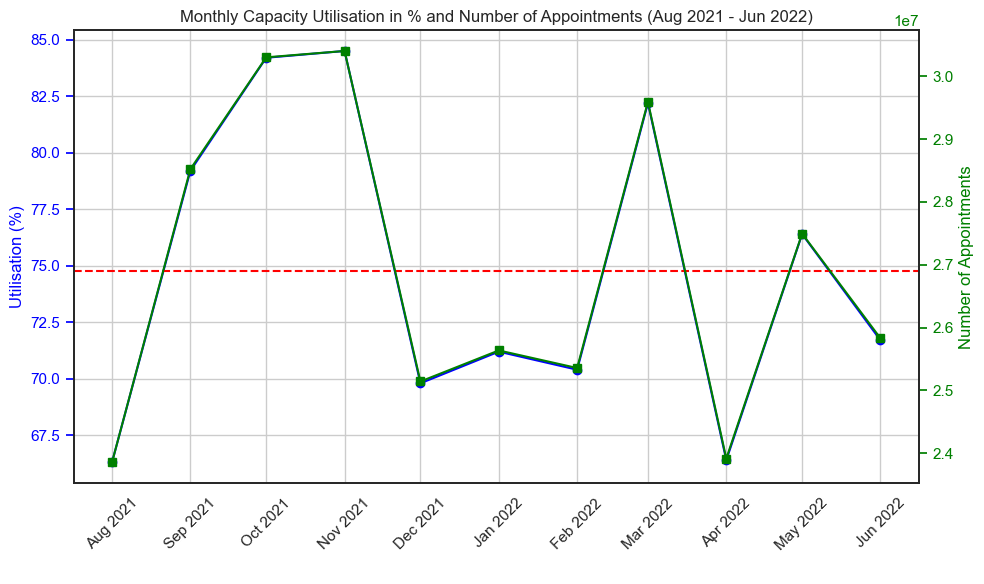

In [105]:
# Lineplot for Monthly Capacity Utilisation
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define DateFormatter
date_formatter = mdates.DateFormatter('%b %Y')

# Plot utilisation on primary y-axis
ax1.plot(total_appointments_per_month['appointment_month'], 
         total_appointments_per_month['utilisation'],
         marker='o', linestyle='-', color='blue')
ax1.set_xlabel(' ')
ax1.set_ylabel('Utilisation (%)', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title('Monthly Capacity Utilisation in % and Number of Appointments (Aug 2021 - Jun 2022)')
ax1.grid(True)

# Create a secondary y-axis for number of appointments
ax2 = ax1.twinx()
ax2.plot(total_appointments_per_month['appointment_month'], 
         total_appointments_per_month['count_of_appointments'],
         marker='s', linestyle='-', color='green')
ax2.set_ylabel('Number of Appointments', color='green')
ax2.tick_params('y', colors='green')

# Calculate and plot mean line
mean_utilisation = total_appointments_per_month['utilisation'].mean()
ax1.axhline(y=mean_utilisation, color='red',
            linestyle='--', label='Mean Utilisation')

# Set date format to display shortened month and year
date_form = DateFormatter('%b %Y')
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_tick_params(rotation=45)
plt.tight_layout()
plt.show()

* Busiest months are Oct/Nov 2021, followed by another peak in Mar 2022
* Max Utilisation is at 84.50%, never going beyond Maximum Capacity of 1,200,000

**Question 2:** How do the healthcare professional types differ over time?

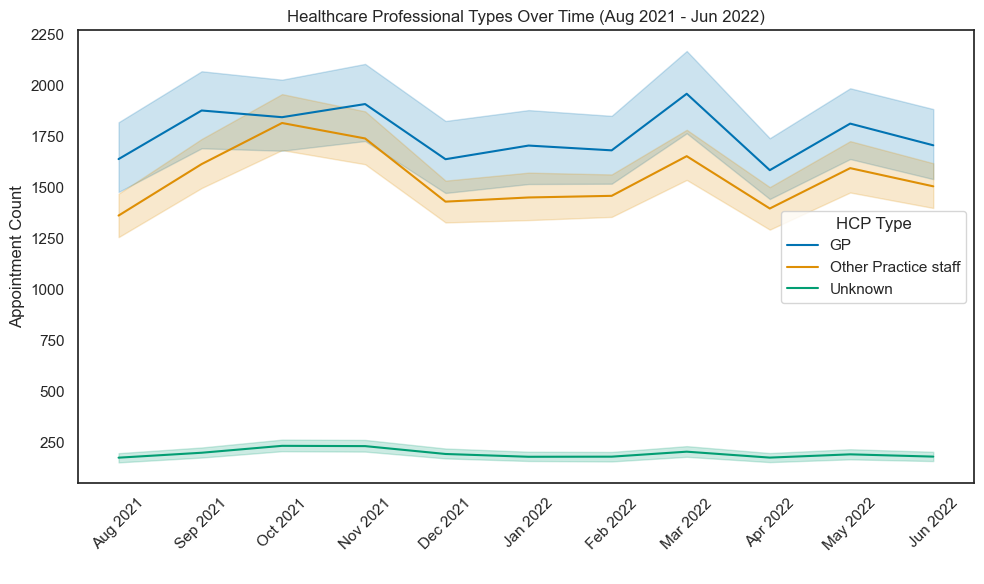

In [106]:
# Set palette
sns.set_palette('colorblind')

# Create a lineplot to show HCP types from Aug 2021 - Jun 2022
date_formatter = DateFormatter('%b %Y')
plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_filtered, x='appointment_month',
             y='count_of_appointments',
             hue='hcp_type')
plt.title('Healthcare Professional Types Over Time (Aug 2021 - Jun 2022)')
plt.xlabel(' ')
plt.ylabel('Appointment Count')
plt.gca().xaxis.set_major_formatter(date_formatter)    # Apply DateFormatter
plt.xticks(rotation=45)
plt.legend(title='HCP Type')
plt.tight_layout()
plt.show()

The trends in healthcare professional types over time (from August 2021 to June 2022) reveal the following insights:

**General Practitioners (GPs):**

* GPs consistently have the highest number of appointments.
* Their counts fluctuate between approximately 1750 and 2250 appointments.

**Other Practice Staff:**

* Their appointment counts also fluctuate but remain significantly lower.
* The range for other practice staff is approximately 250 to 750 appointments.

**Unknown Category:**

* This category remains constant at a very low count throughout the entire period.

* In summary, GPs handle the majority of appointments, while other practice staff contribute to a smaller portion. 
* The 'Unknown' category represents a negligible number of appointments.

**Question 3:** Are there significant changes in whether or not visits are attended?

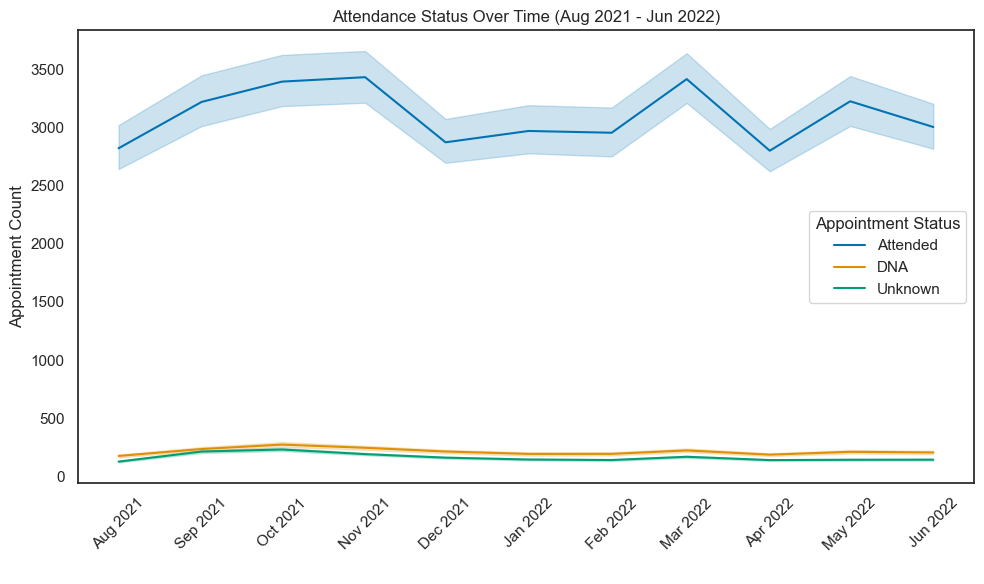

In [107]:
# Create a lineplot to show attendance and determine potential changes
plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_filtered, x='appointment_month',
             y='count_of_appointments',
             hue='appointment_status')
plt.title('Attendance Status Over Time (Aug 2021 - Jun 2022)')
plt.xlabel(' ')
plt.ylabel('Appointment Count')
plt.gca().xaxis.set_major_formatter(date_formatter)  # Apply DateFormatter
plt.xticks(rotation=45)
plt.legend(title='Appointment Status')
plt.tight_layout()
plt.show()

**Question 4:** Are there changes in terms of appointment mode in the busiest months?

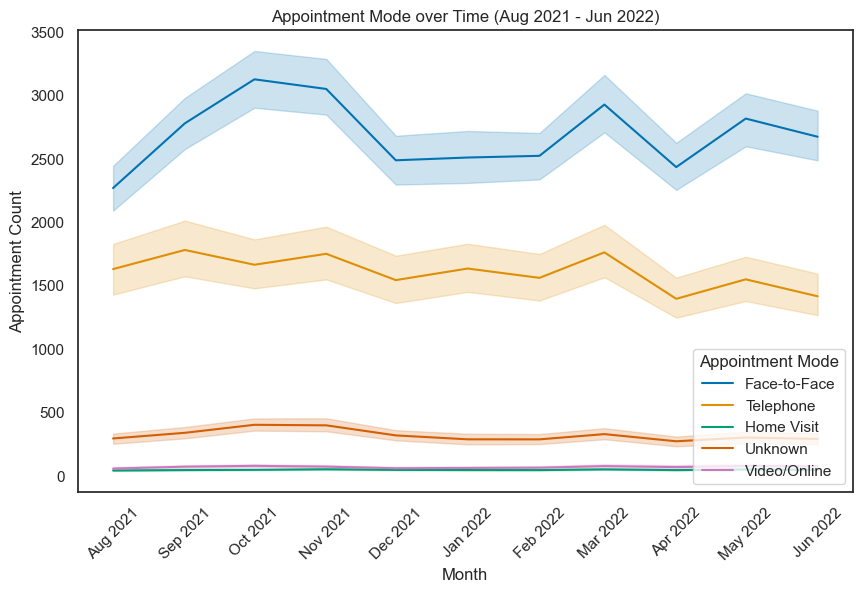

In [108]:
# Specify hue order
hue_order_am = ar_filtered['appointment_mode'].value_counts().index

# Set palette
sns.set_palette('colorblind')

# Create a lineplot to investigate appointment mode 
plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_filtered, x='appointment_month',
             y='count_of_appointments',
             hue='appointment_mode',
             hue_order=hue_order_am)
plt.title('Appointment Mode over Time (Aug 2021 - Jun 2022)')
plt.xlabel('Month')
plt.ylabel('Appointment Count')
plt.gca().xaxis.set_major_formatter(date_formatter)  # Apply DateFormatter
plt.xticks(rotation=45)
plt.legend(title='Appointment Mode', loc='lower right')
plt.show()

In [109]:
# Busiest months are Oct/Nov 2021, followed by another peak in Mar 2022
# Investigate HCP Type and Appointment Mode for peak months
ar_busy =  ar_filtered[['appointment_month',
                        'appointment_status',
                        'hcp_type',
                        'count_of_appointments']].\
groupby(['appointment_month',
         'appointment_status',
         'hcp_type']).\
sum().reset_index()

# View
ar_busy.head()

,appointment_month,appointment_status,hcp_type,count_of_appointments
0,2021-08-01,Attended,GP,11712148
1,2021-08-01,Attended,Other Practice staff,9692192
2,2021-08-01,Attended,Unknown,677425
3,2021-08-01,DNA,GP,272890
4,2021-08-01,DNA,Other Practice staff,655689


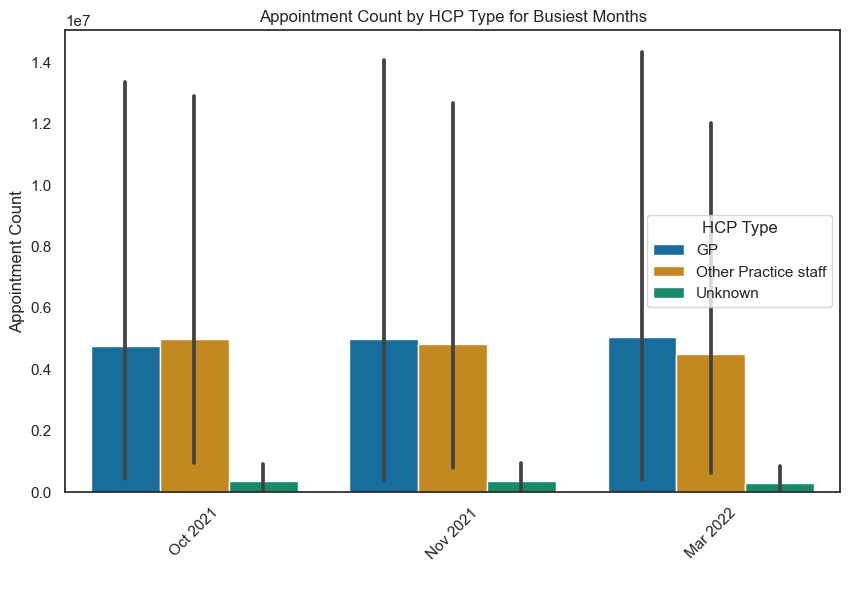

In [110]:
# Filter the DataFrame for only the desired months
ar_busy_peak = ar_busy[ar_busy['appointment_month']\
                       .isin(['2021-10-01', '2021-11-01', '2022-03-01'])]

# Create DateFormatter with explicit date format
date_formatter = DateFormatter('%b %Y')

# Set palette
sns.set_palette('colorblind')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ar_busy_peak,
            x='appointment_month',
            y='count_of_appointments',
            hue='hcp_type')
plt.title('Appointment Count by HCP Type for Busiest Months')
plt.xlabel(' ')
plt.ylabel('Appointment Count')

# Set tick positions and labels
tick_positions = range(len(ar_busy_peak['appointment_month'].unique()))
tick_labels = ['Oct 2021', 'Nov 2021', 'Mar 2022']
plt.gca().set_xticks(tick_positions)
plt.gca().set_xticklabels(tick_labels)

plt.xticks(rotation=45)
plt.legend(title='HCP Type')
plt.show()

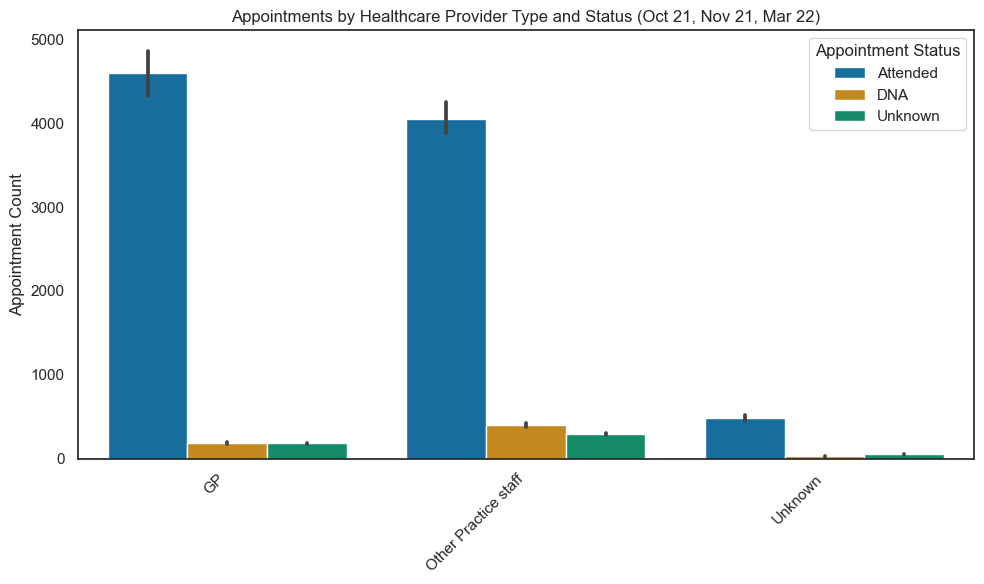

In [111]:
# Filter data for the busiest months
busiest_months = ['2021-10-01', '2021-11-01', '2022-03-01']
filtered_df = ar[ar['appointment_month'].isin(busiest_months)]

# Define the order of categories for 'hcp_type'
hcp_type_order = ['GP', 'Other Practice staff', 'Unknown']

# Set palette
sns.set_palette('colorblind')

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df,
            x='hcp_type',
            y='count_of_appointments',
            hue='appointment_status',
            hue_order=['Attended', 'DNA', 'Unknown'])

plt.ylabel('Appointment Count')
plt.title('Appointments by Healthcare Provider Type and Status (Oct 21, Nov 21, Mar 22)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Appointment Status')
plt.xlabel('')
plt.tight_layout()
plt.show()

**Question 5:** Are there any trends in time between booking an appointment?

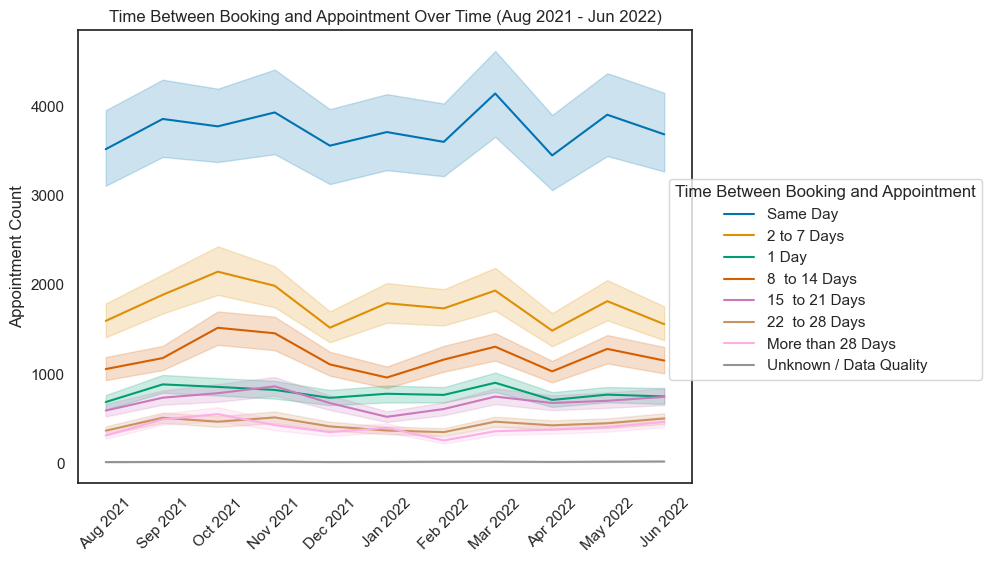

In [112]:
# Create a lineplot to investigate Appointment Roll-over over time

# Define hue order to descending
hue_order = ar_filtered['time_between_book_and_appointment'].value_counts().index

# Set palette
sns.set_palette('colorblind')

# Lineplot to investigate Appointment Roll-over over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_filtered, x='appointment_month',
             y='count_of_appointments',
             hue='time_between_book_and_appointment',
             hue_order=hue_order)    # Specify hue order
plt.title('Time Between Booking and Appointment Over Time (Aug 2021 - Jun 2022)')
plt.xlabel(' ')
plt.ylabel('Appointment Count')
plt.gca().xaxis.set_major_formatter(date_formatter)  # Apply DateFormatter
plt.xticks(rotation=45)
plt.legend(title='Time Between Booking and Appointment',
           bbox_to_anchor=(0.95, 0.45), loc='center left')
plt.tight_layout()
plt.show()

Checking **Unknown/Data Quality** is correct:

In [113]:
# Determine sum of 'Unknown/Data Quality' in 'time_between_book_and_appointment'
unknown_count = ar['time_between_book_and_appointment']\
.value_counts().get('Unknown/Data Quality', 0)
print("Sum of 'Unknown/Data Quality' for the period of Aug 2021 - Jun 2022 is:", unknown_count)

Sum of 'Unknown/Data Quality' for the period of Aug 2021 - Jun 2022 is: 0


## Appointments and Attendance - deep dive

### Correlation Matrix

### ar Appointment Status and Time matrix
Investigating how the time between booking and appointment ('1 Day', '15 to 21 Days', etc.) relates to appointment status can help understand whether longer waiting times or short notice appointments impact attendance.

In [114]:
# Create a DataFrame with the specified variables
ar_time_matrix = ['appointment_status',
                  'time_between_book_and_appointment']
time_numerical_data = ar[ar_time_matrix]

# Convert categorical variables into numerical using one-hot encoding
time_numerical_data = pd.get_dummies(time_numerical_data)

# Calculate correlation matrix
time_correlation_matrix = time_numerical_data.corr()

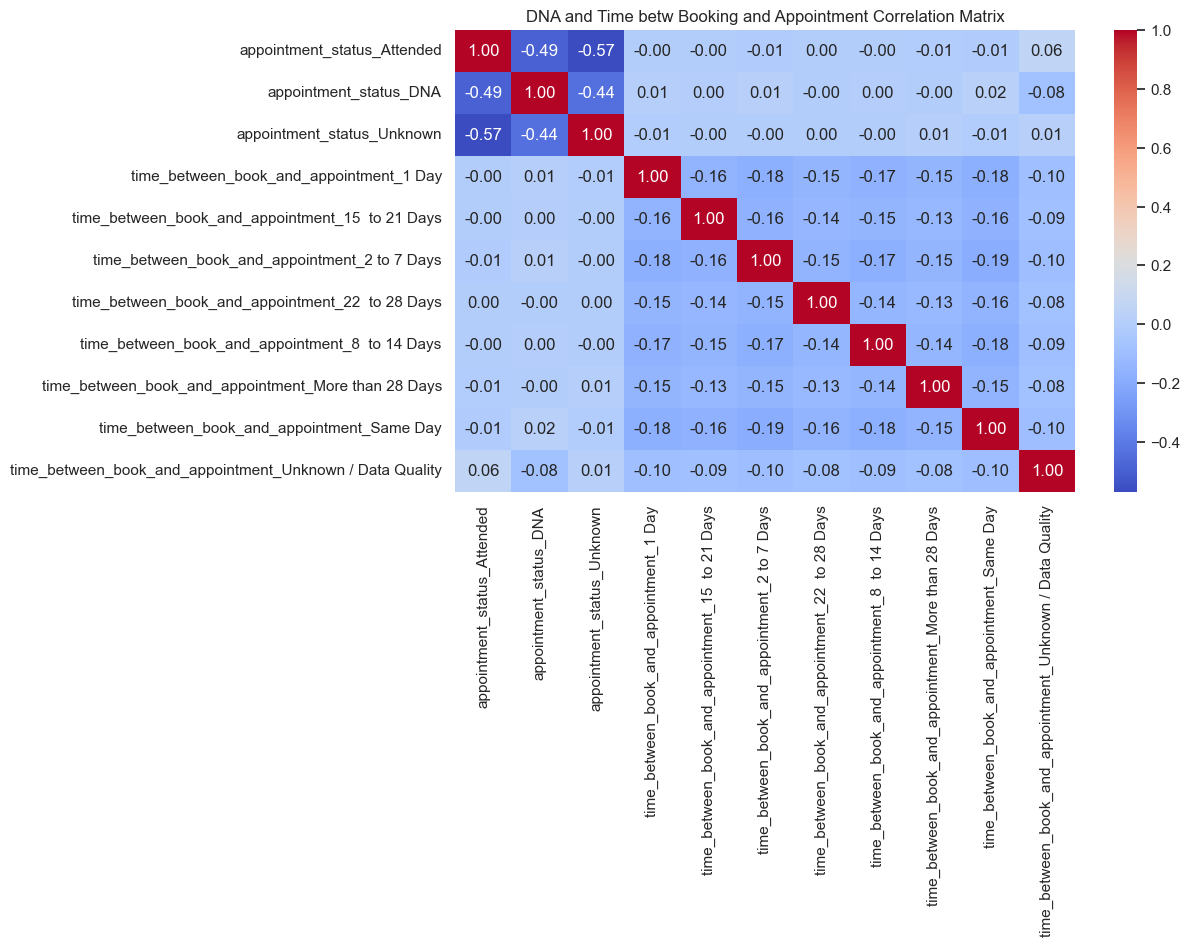

In [115]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(time_correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f")
plt.title('DNA and Time betw Booking and Appointment Correlation Matrix')
plt.show()

* Turnover_1 day, Turnover_15 to 21 days, Turnover_2 to 7 days, Turnover_8 to 14 days, and Turnover_more than 28 days all show **weak correlations** with Attended, DNA, and Unknown appointments, as the values are close to 0.
* **Turnover_Same Day** has a slightly stronger negative correlation with Attended appointments and a slightly positive correlation with DNA appointments.
* **Unknown / Data Quality** has a moderate positive correlation with Attended appointments and a moderate negative correlation with DNA appointments.

In summary, these outcomes suggest that there are varied and generally weak correlations between the different types of appointment turnovers and the attendance patterns, with some weak to moderate correlations between appointment turnover and data quality.

### ar Appointment Status and Appointment Mode matrix
Analysing the relationship between appointment status ('Attended', 'Unknown', 'DNA') and appointment mode ('Face-to-Face', 'Telephone', 'Remote Appointment') can provide insights into whether certain modes are associated with higher rates of missed appointments.

In [116]:
# Create a DataFrame with the specified variables
ar_appt_matrix = ['appointment_status',
                  'appointment_mode']
appt_numerical_data = ar[ar_appt_matrix]

# Convert categorical variables into numerical using one-hot encoding
appt_numerical_data = pd.get_dummies(appt_numerical_data)

# Calculate correlation matrix
appt_correlation_matrix = appt_numerical_data.corr()

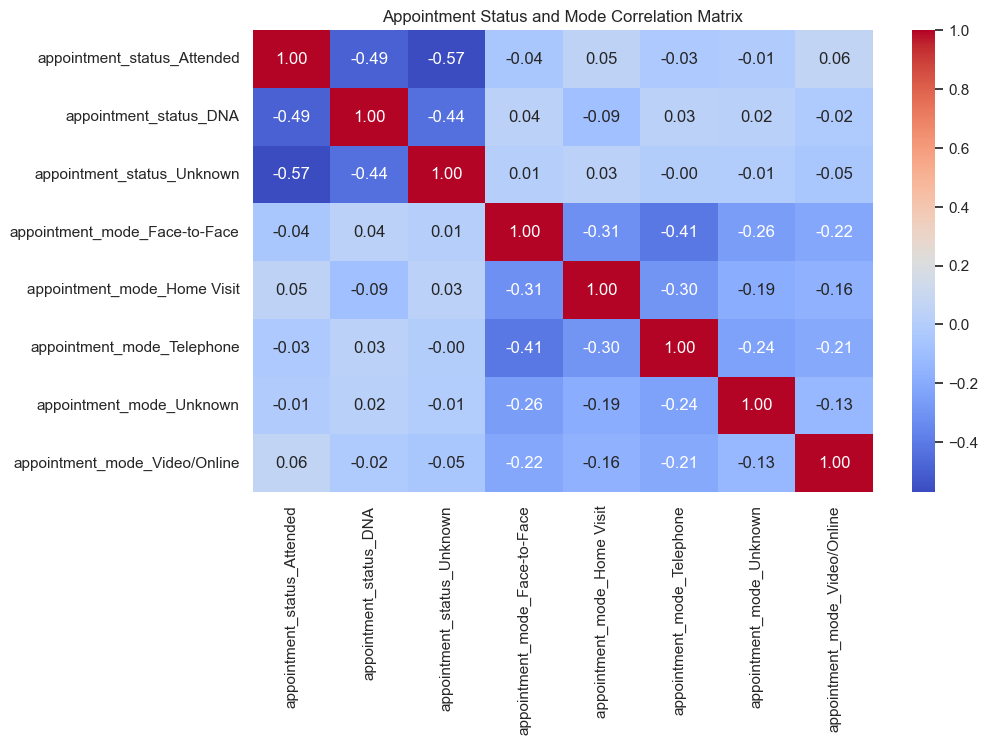

In [117]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(appt_correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f")
plt.title('Appointment Status and Mode Correlation Matrix')
plt.show()

#### In examining appointment stati ('Attended', 'DNA', 'Unknown') in relation to appointment modes, weak correlations were observed. 
* **Face-to-face** appointments showed a slight decrease in attendance and slight increase in DNA. 
* **Home visits** correlated positively with attendance and negatively with DNA. 
* **Telephone appointments** exhibited a slight decrease in attendance and slight increase in DNA. 
* **Unknown** modes showed no significant correlation. 
* **Video/online** appointments had a slight increase in attendance and slight decrease in unknown statuses. 

These findings highlight nuanced associations between appointment modes and outcomes, suggesting potential areas for further investigation in healthcare delivery.

### ar HCP matrix
HCP Type and Appointment Status: Exploring the relationship between healthcare professional (HCP) type ('Other Practice staff', 'GP', 'Unknown') and appointment status can reveal whether certain types of healthcare providers have higher or lower rates of missed appointments.

In [118]:
# Create a DataFrame with the specified variables
ar_hcp_matrix = ['appointment_status',
                 'hcp_type']
numerical_data = ar[ar_hcp_matrix]

# Convert categorical variables into numerical using one-hot encoding
numerical_data = pd.get_dummies(numerical_data)

# Calculate correlation matrix
hcp_correlation_matrix = numerical_data.corr()

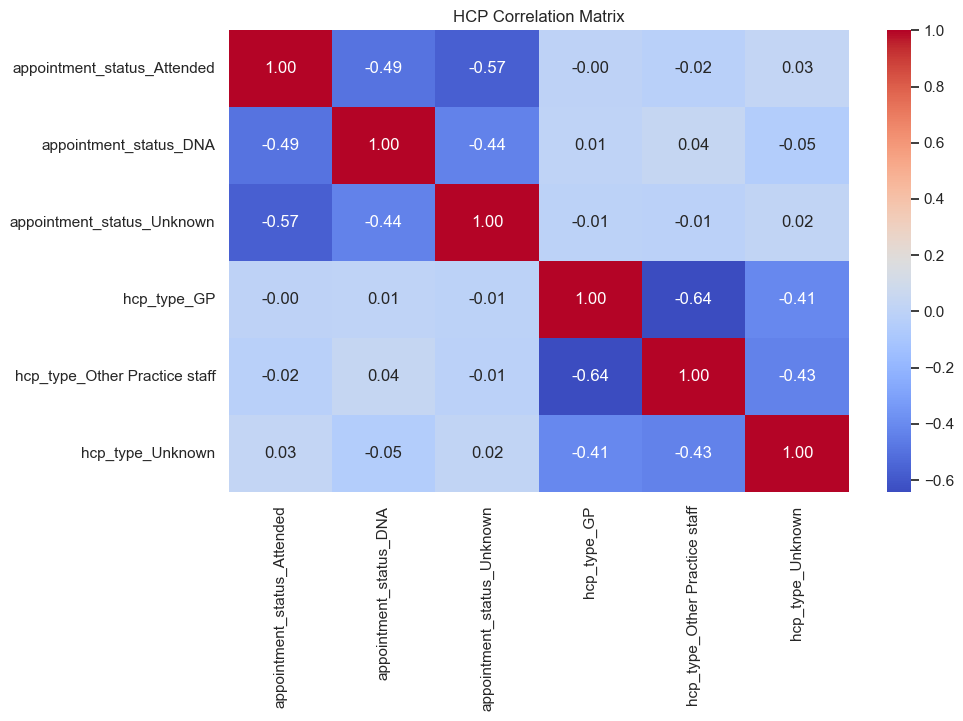

In [119]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hcp_correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f")
plt.title('HCP Correlation Matrix')
plt.show()

* **GP** has near-zero correlation with 'appointment_status_Attended', 'appointment_status_DNA', and 'appointment_status_Unknown'.
* **Other Practice Staff** has weak negative correlation with 'appointment_status_Attended' and 'appointment_status_Unknown', and weak positive correlation with 'appointment_status_DNA'.
* **Unknown** has weak positive correlation with 'appointment_status_Attended' and 'appointment_status_Unknown', and weak negative correlation with 'appointment_status_DNA'.

These correlation values suggest that there is little to no linear relationship between the HCP types and the appointment stati, or the relationships are very weak.

### Matrix follow-up Investigation and Visualisation

Since the Correlation Matrix outcomes are not conclusive by themselves, further investigation is required.

**Question i:** Time between Booking and Appointment vs. Appointment Status

In [120]:
ar_totals = ar.groupby(['appointment_status',
                        'time_between_book_and_appointment'])\
['count_of_appointments'].sum()
#print(ar_totals)

# Output in Appendix

In [121]:
# Calculating the total count of appointments for each 'appointment_status'
total_counts = ar.groupby('appointment_status')\
['count_of_appointments'].sum()

# Calculating the percentages for each category
percentages = ar_totals / total_counts * 100
#percentages

# Output in Appendix

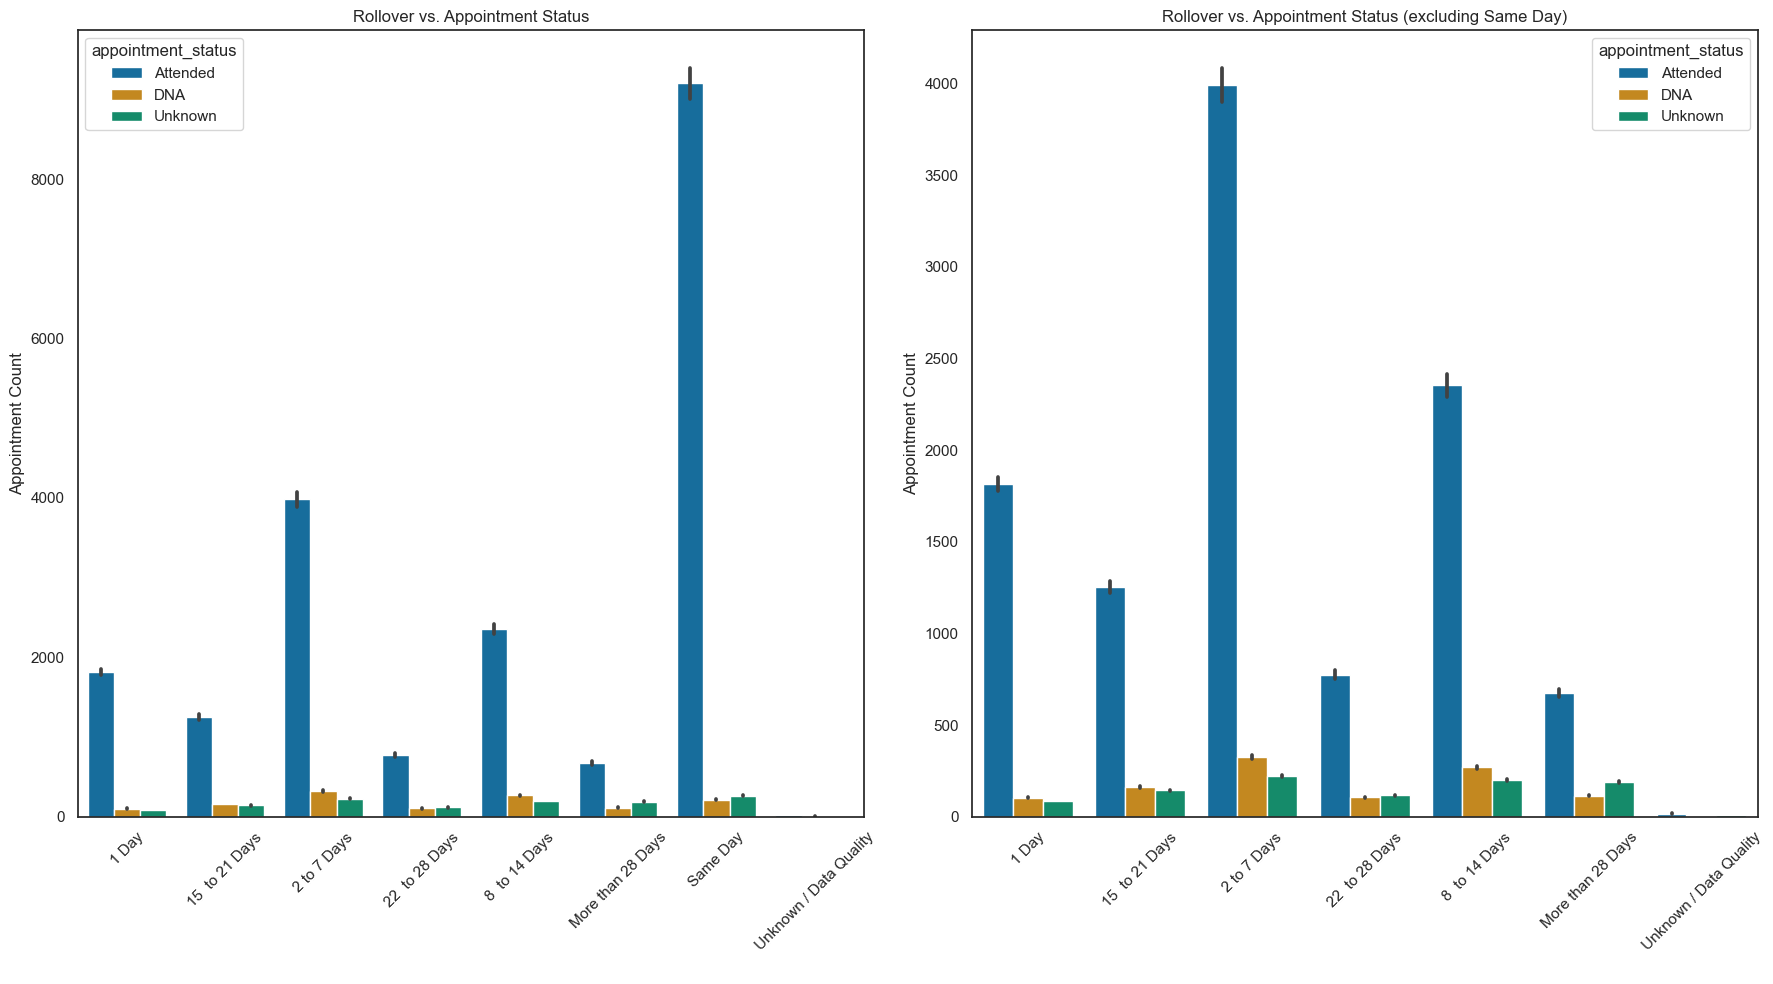

In [122]:
# Investigate service_settings spread with 'Same Day' vs without 'Same Day'
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

# Boxplot to investigate the spread of service settings
sns.barplot(data=ar, x='time_between_book_and_appointment',
            y='count_of_appointments',
            hue='appointment_status',
            ax=axs[0])
axs[0].set_title('Rollover vs. Appointment Status')
axs[0].set_xlabel(' ')
axs[0].set_ylabel('Appointment Count')
axs[0].tick_params(axis='x', rotation=45)

# Boxplot to investigate the service settings without GP
sns.barplot(data=ar[ar['time_between_book_and_appointment'] != 'Same Day'],
            x='time_between_book_and_appointment',
            y='count_of_appointments',
            hue='appointment_status',
            ax=axs[1])
axs[1].set_title('Rollover vs. Appointment Status (excluding Same Day)')
axs[1].set_xlabel(' ')
axs[1].set_ylabel('Appointment Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The data reveals variations in appointment status based on the time between booking and the actual appointment. 
* **Same Day** has highest attendance rate at 48.45%; followed by **2 to 7 Days** at 20.38%
* Appointments scheduled for **15 Days or more** have attendance rate under 5.3%
* Those scheduled for **2 to 7 Days** have hightest non-attendance (DNA) at 28.14%, followed by **8 to 14 & Same Day** at around 20%. 

**It is important to keep in mind that the overall numbers of DNA and Unknown are low (see chart above for reference).**
Still, the numbers are clearly emphasising the need for targeted interventions to improve overall attendance.

**Question ii:** Appointment Status vs. Appointment Mode

In [123]:
# Investigate 'appointment_mode' percentages
mode_status = ar.groupby(['appointment_mode',
                          'appointment_status']).size().unstack(fill_value=0)
mode_status['total'] = mode_status.sum(axis=1)
mode_status['attended_percent'] = (mode_status['Attended'] / mode_status['total']) * 100
mode_status['dna_percent'] = (mode_status['DNA'] / mode_status['total']) * 100
mode_status['unknown_percent'] = (mode_status['Unknown'] / mode_status['total']) * 100

# View
mode_status.head()

appointment_status,Attended,DNA,Unknown,total,attended_percent,dna_percent,unknown_percent
appointment_mode,,,,,,,
Face-to-Face,64478,53770,62162,180410,35.739704,29.804335,34.455961
Home Visit,48608,21386,41200,111194,43.714589,19.233052,37.052359
Telephone,60796,49696,55991,166483,36.517843,29.850495,33.631662
Unknown,29526,23784,25837,79147,37.305267,30.050413,32.644320
Video/Online,28729,14724,16134,59587,48.213537,24.710088,27.076376


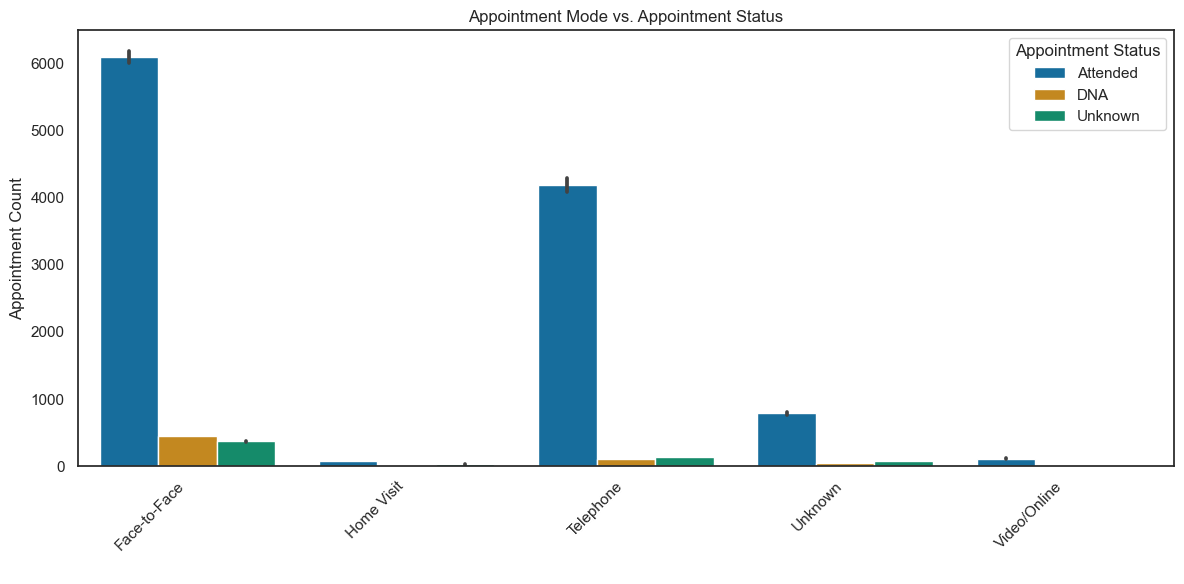

In [124]:
plt.figure(figsize=(12, 6))
sns.barplot(data=ar, x='appointment_mode',
            y='count_of_appointments',
            hue='appointment_status')
plt.title('Appointment Mode vs. Appointment Status')
plt.xlabel(' ')
plt.ylabel('Appointment Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Appointment Status')
plt.tight_layout()
plt.show()

The analysis shows distinct patterns of appointment status across different modes. 
* **Face-to-Face** appointments have a balanced distribution among attended, DNA, and unknown categories. 
* **Home Visits** boast the highest attendance percentage (43.71%), suggesting this mode fosters patient commitment. 
* In contrast, **Telephone** and **Video/Online** appointments exhibit higher DNA percentages (29.85% and 24.71%, respectively), warranting further investigation into factors affecting remote attendance.

**Question iii:** HCP Type vs. Appointment Status

In [125]:
# Investigate 'hcp_type' percentages
hcp_status = ar.groupby(['hcp_type',
                         'appointment_status']).size().unstack(fill_value=0)
hcp_status['total'] = hcp_status.sum(axis=1)
hcp_status['attended_percent'] = (hcp_status['Attended'] / hcp_status['total']) * 100
hcp_status['dna_percent'] = (hcp_status['DNA'] / hcp_status['total']) * 100
hcp_status['unknown_percent'] = (hcp_status['Unknown'] / hcp_status['total']) * 100

# View
hcp_status.head()

appointment_status,Attended,DNA,Unknown,total,attended_percent,dna_percent,unknown_percent
hcp_type,,,,,,,
GP,87868,62788,75380,226036,38.873454,27.777876,33.348670
Other Practice staff,90852,70993,79712,241557,37.610999,29.389751,32.999251
Unknown,53417,29579,46232,129228,41.335469,22.889002,35.775529


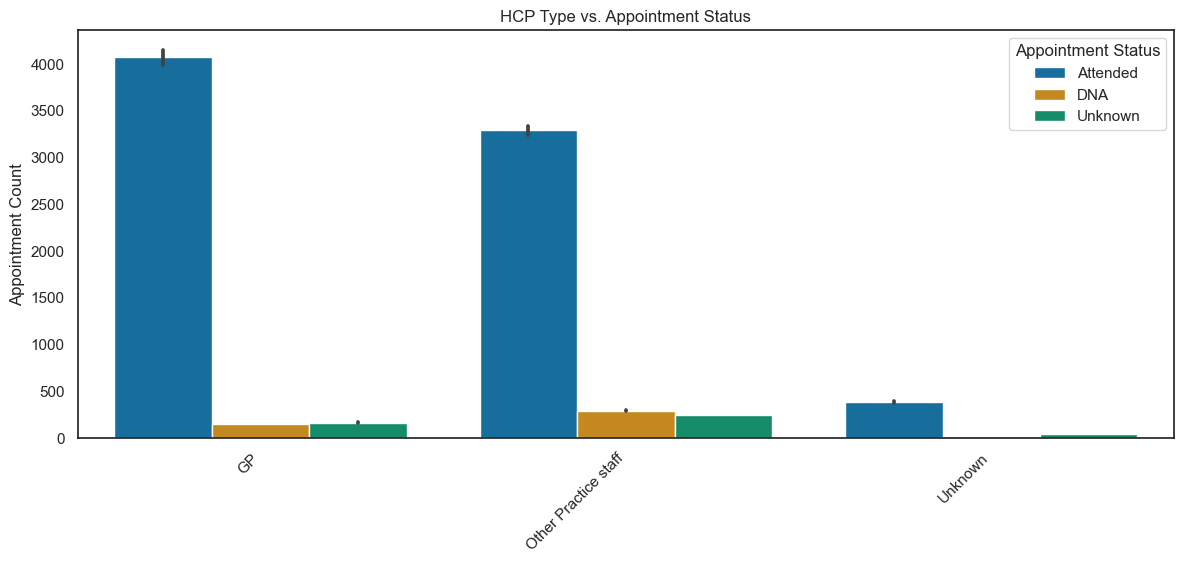

In [126]:
plt.figure(figsize=(12, 6))
sns.barplot(data=ar, x='hcp_type',
            y='count_of_appointments',
            hue='appointment_status')
plt.title('HCP Type vs. Appointment Status')
plt.xlabel(' ')
plt.ylabel('Appointment Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Appointment Status')
plt.tight_layout()
plt.show()

Examining appointment status across Healthcare Provider (HCP) types reveals noteworthy trends: 
* **General Practitioners** (GPs) demonstrate balanced attendance rates, with 38.87%, while 
* **Other Practice Staff** have slightly lower attendance (37.61%). 
* **Unknown HCP** types exhibit the highest attendance (41.34%) **but also** the highest DNA rate (22.89%). 

These insights suggest tailored strategies for improving attendance, particularly for appointments involving non-GP staff and cases with unknown providers.

**Question 6:** How does the spread of service settings compare?

In [127]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity

In [128]:
# Group by 'appointment_month' and sum the counts of appointments
monthly_appointments = nc.groupby(['appointment_month',
                                 'service_setting'])\
['count_of_appointments'].sum().reset_index()

# View the DataFrame
monthly_appointments.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,160927
1,2021-08-01,General Practice,21575852
2,2021-08-01,Other,449101
3,2021-08-01,Primary Care Network,432448
4,2021-08-01,Unmapped,1233843


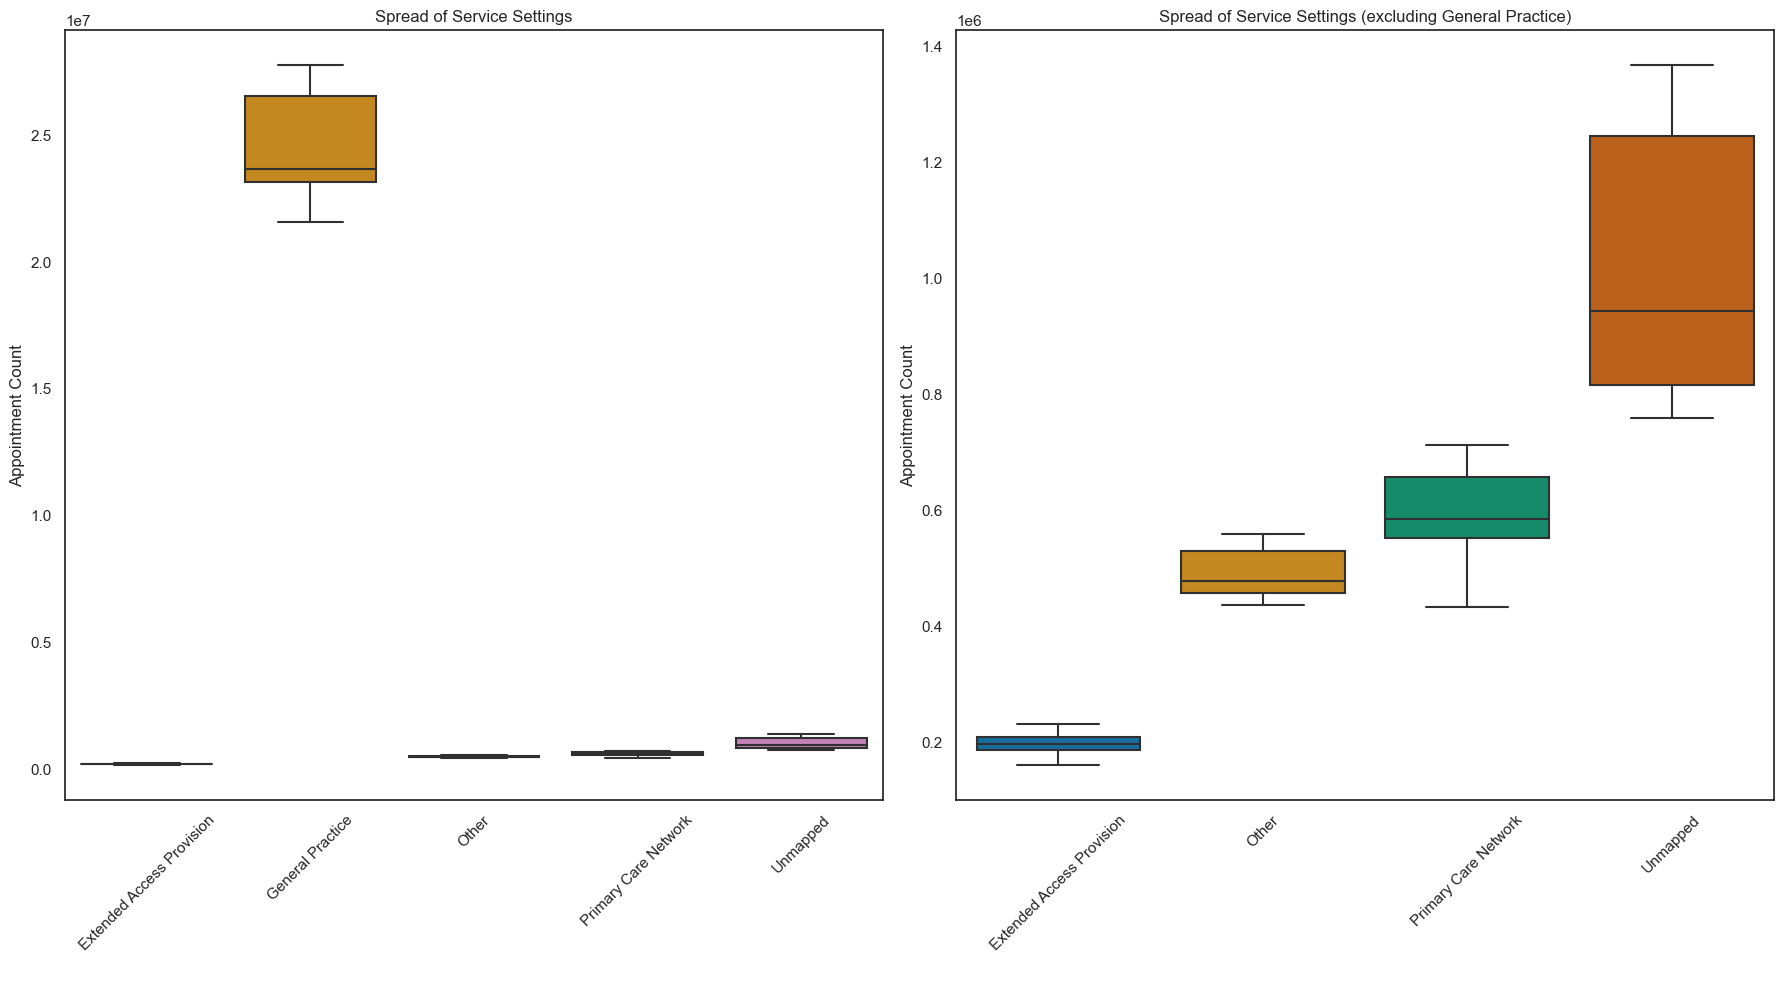

In [129]:
# Investigate service_settings spread with GP vs without GP
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

# Boxplot to investigate the spread of service settings
sns.boxplot(data=monthly_appointments, x='service_setting',
            y='count_of_appointments', ax=axs[0])
axs[0].set_title('Spread of Service Settings')
axs[0].set_xlabel(' ')
axs[0].set_ylabel('Appointment Count')
axs[0].tick_params(axis='x', rotation=45)

# Boxplot to investigate the service settings without GP
sns.boxplot(data=monthly_appointments[monthly_appointments['service_setting'] != 'General Practice'],
            x='service_setting', y='count_of_appointments',
            ax=axs[1])
axs[1].set_title('Spread of Service Settings (excluding General Practice)')
axs[1].set_xlabel(' ')
axs[1].set_ylabel('Appointment Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

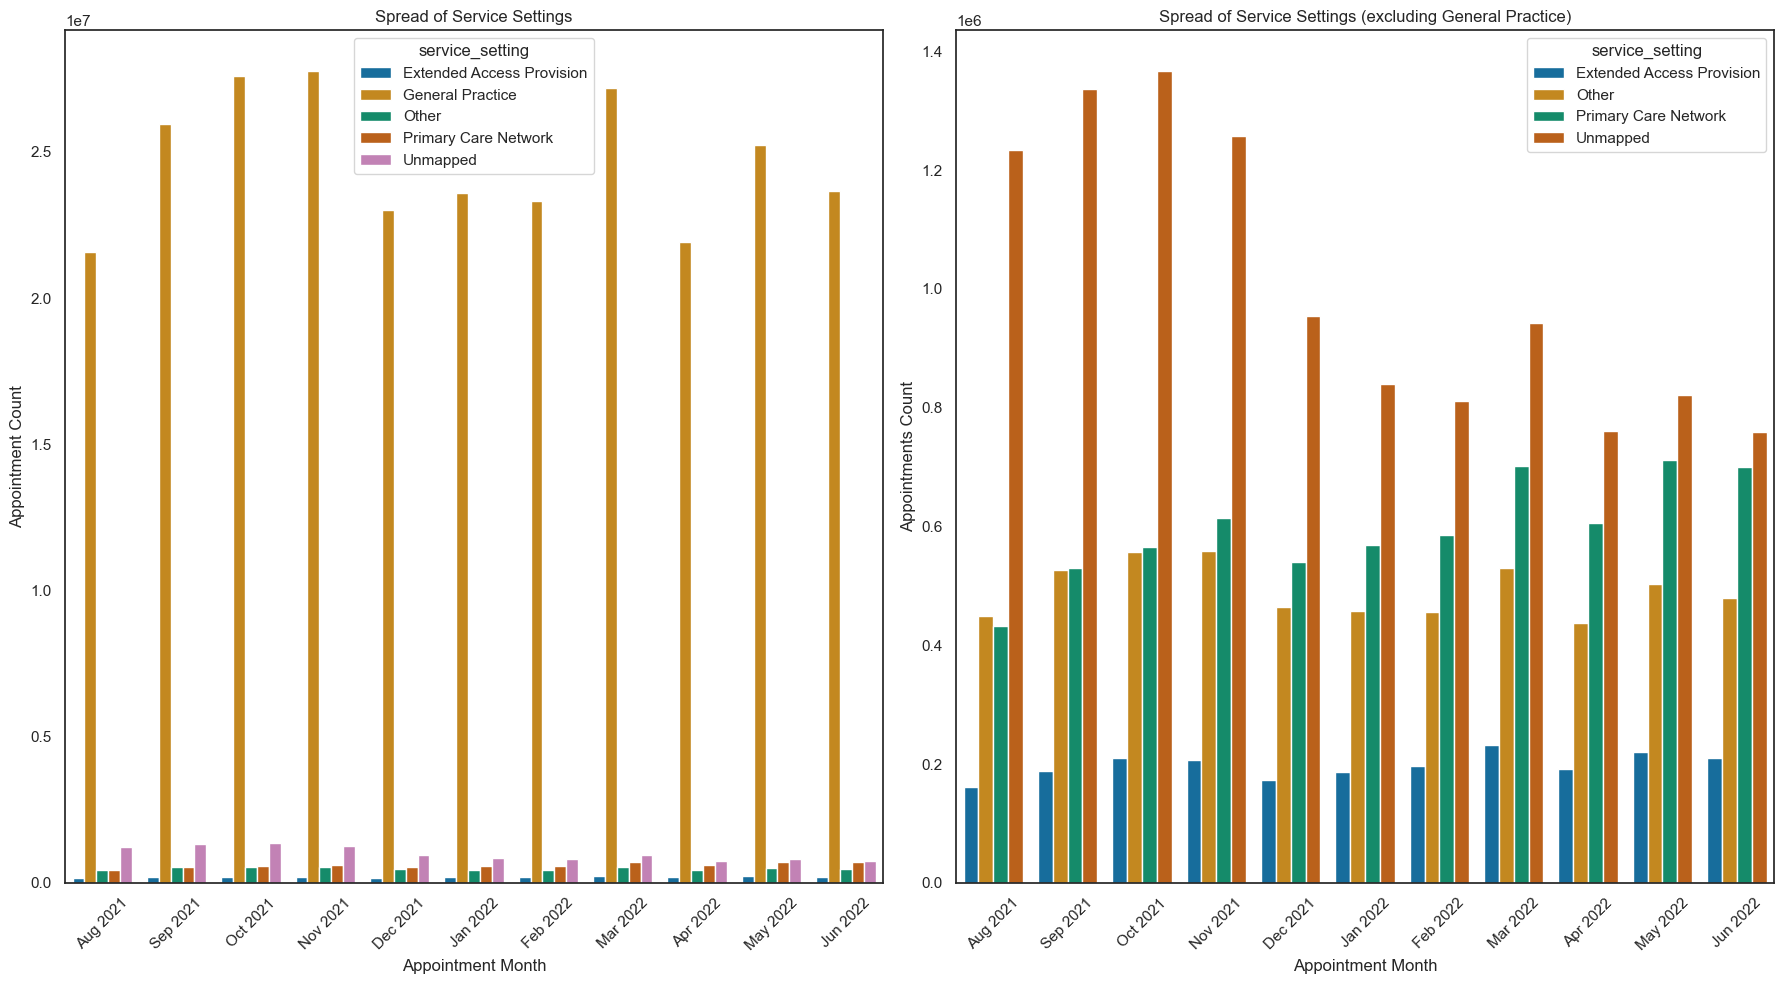

In [130]:
# Convert 'appointment_month' to datetime
monthly_appointments['appointment_month'] = pd.to_datetime(monthly_appointments['appointment_month'])

# Convert 'appointment_month' to month and year format
monthly_appointments['appointment_month_str'] = monthly_appointments['appointment_month']\
.dt.strftime('%b %Y')

# Investigate service_settings spread with GP vs without GP
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

# Boxplot to investigate the spread of service settings
sns.barplot(data=monthly_appointments, x='appointment_month_str',
            y='count_of_appointments', hue='service_setting',
            ax=axs[0])
axs[0].set_title('Spread of Service Settings')
axs[0].set_xlabel('Appointment Month')
axs[0].set_ylabel('Appointment Count')
axs[0].tick_params(axis='x', rotation=45)

# Boxplot to investigate the service settings without GP
sns.barplot(data=monthly_appointments[monthly_appointments['service_setting'] != 'General Practice'],
            x='appointment_month_str', y='count_of_appointments',
            hue='service_setting', ax=axs[1])
axs[1].set_title('Spread of Service Settings (excluding General Practice)')
axs[1].set_xlabel('Appointment Month')
axs[1].set_ylabel('Appointments Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Provide a summary of your findings and recommendations based on the analysis.

**Summary of Findings:**

* Appointment Scheduling Trends: The analysis revealed consistent scheduling of appointments between August 2021 and June 2022. Seasonal trends were observed, with November 2021 recording the highest number of appointments.

* Service Settings in NHS North West London: General Practice emerged as the most popular service setting, followed by Other, Primary Care Network, Extended Access Provision, and Unmapped. However, discrepancies in the 'Unmapped' category suggest potential data management issues.

* Healthcare Professional Types Over Time: Minimal fluctuation was observed in the distribution of healthcare professional types over time. General Practitioners (GPs) remained consistently prominent, while 'Other Practice Staff' showed a slight increase in prominence, indicating potential shifts in service delivery.

* Appointment Attendance Rates: No significant changes were observed in attendance rates over the investigated time period. 'Attended' appointments consistently had the highest frequency, while 'Did Not Attend' (DNA) and 'Unknown' stati remained relatively low.

* Changes in Appointment Modes During Busiest Months: Face-to-Face appointments were most common during peak periods, but a slight increase in DNA appointments for 'Other Practice Staff' suggests staffing challenges.

**Summary of Recommendations:**

* Improve Data Quality: Implement measures to enhance data quality, including regular audits and validation checks. Explore standardising data entry protocols across healthcare facilities to minimise inconsistencies.

* Targeted Interventions: Develop and implement targeted interventions to improve attendance rates, particularly for appointments with longer intervals between booking and appointment dates. Address staffing challenges during peak periods by ensuring adequate coverage of healthcare professionals, especially 'Other Practice Staff' who may fill in for GPs.

* Optimise Appointment Modes: Explore strategies to optimise appointment modes. Monitor effectiveness and refine strategies based on ongoing analysis and stakeholder feedback.

* Social Media: Twitter (rebranded as 'X') communications should be revisited and new strategies applied, to ensure proper application of NHS hastags to increase reach of tweets. Additionally, in-depth social media data analysis would provide valuable insights into engagement rates, common themes (i.e. co-occuring hashtags), and general sentiment.

**Conclusion:**
The analysis of NHS GP appointments data provided valuable insights into appointment scheduling trends, healthcare professional types, attendance rates, and appointment modes. By implementing the recommended strategies and continuing to monitor and analyse the data, the NHS can optimize resource utilization, improve patient outcomes, and enhance healthcare service delivery.

**Next Steps:**

* Address data quality issues and discrepancies identified in the analysis.
* Implement targeted interventions based on the findings to improve attendance rates and optimise resource utilisation.
* Monitor and evaluate the effectiveness of implemented interventions through ongoing data analysis and stakeholder feedback.
* Continuously refine strategies and processes to address emerging challenges and optimise service delivery within the NHS.